In [192]:
import numpy as np
import scipy as sp
from scipy import linalg as la
import pandas as pd
import matplotlib.pyplot as plt

In [193]:
file = 'SouthCalifornia-1982-2011_Physics-of-Data.dat'
data = np.genfromtxt(file,
                     dtype=None,
                     delimiter=' ')
data.shape

(110271,)

In [194]:
#help(np.genfromtxt)

In [195]:
df = pd.DataFrame(data)

In [196]:
df.columns = ['event', 'prev_event', 'time', 'magnitude', 'x', 'y', 'z']

In [197]:
#df[df['prev_event'] == 0]

In [198]:
prev_event = df['prev_event']
uniques = np.unique(prev_event)
print(uniques[:100])
print(len(uniques))

[ -1   0  33  51  87 125 175 200 209 248 290 300 351 369 374 391 402 437
 460 465 495 528 578 616 633 658 671 677 700 704 730 750 751 756 757 758
 762 763 766 769 773 777 785 793 795 798 800 816 817 818 819 822 825 826
 829 835 838 839 842 845 847 848 854 858 860 863 864 866 873 881 886 887
 889 895 896 897 902 903 904 905 909 910 911 913 916 919 924 925 927 928
 929 935 940 943 944 945 947 950 953 956]
29021


In [199]:
df[df['magnitude']>6]

,event,prev_event,time,magnitude,x,y,z
3599,3599,-1,4.194869e+07,6.07,-2570246,-4442718,3726452
8830,8830,-1,9.126304e+07,6.03,-2416580,-4432874,3869871
21867,21867,21866,1.858990e+08,6.20,-2316585,-4796535,3470023
22089,22089,21867,1.859399e+08,6.60,-2322573,-4795291,3462353
37455,37455,37449,3.251864e+08,6.10,-2335795,-4723356,3549940
39805,39805,39804,3.309144e+08,7.30,-2341818,-4710335,3575181
39859,39859,39858,3.309257e+08,6.30,-2373276,-4692488,3573922
55532,55532,-1,3.588626e+08,6.10,-2364815,-4481227,3839436
58367,58367,-1,3.799916e+08,6.70,-2508327,-4610300,3567642
75422,75422,75419,5.612489e+08,7.10,-2316706,-4693410,3609984


In [200]:
df.describe()

,event,prev_event,time,magnitude,x,y,z
count,110271.000000,110271.000000,1.102710e+05,110271.000000,1.102710e+05,1.102710e+05,1.102710e+05
mean,55135.000000,35859.277625,4.262426e+08,2.457920,-2.388225e+06,-4.691072e+06,3.562612e+06
std,31832.640104,36365.001297,2.598605e+08,0.438374,8.878019e+04,1.237294e+05,1.271897e+05
min,0.000000,-1.000000,0.000000e+00,2.000000,-2.770239e+06,-5.020849e+06,3.186133e+06
25%,27567.500000,-1.000000,2.115783e+08,2.140000,-2.421620e+06,-4.801152e+06,3.458838e+06
50%,55135.000000,28462.000000,3.551023e+08,2.340000,-2.361829e+06,-4.699729e+06,3.564367e+06
75%,82702.500000,66972.000000,5.952398e+08,2.640000,-2.329898e+06,-4.615062e+06,3.634552e+06
max,110270.000000,110250.000000,9.305667e+08,7.300000,-1.998294e+06,-4.268289e+06,3.876120e+06


In [201]:
from mpl_toolkits.mplot3d import Axes3D

In [202]:
x_coord = df['x']
y_coord = df['y']
z_coord = df['z']
magnitude = df['magnitude']

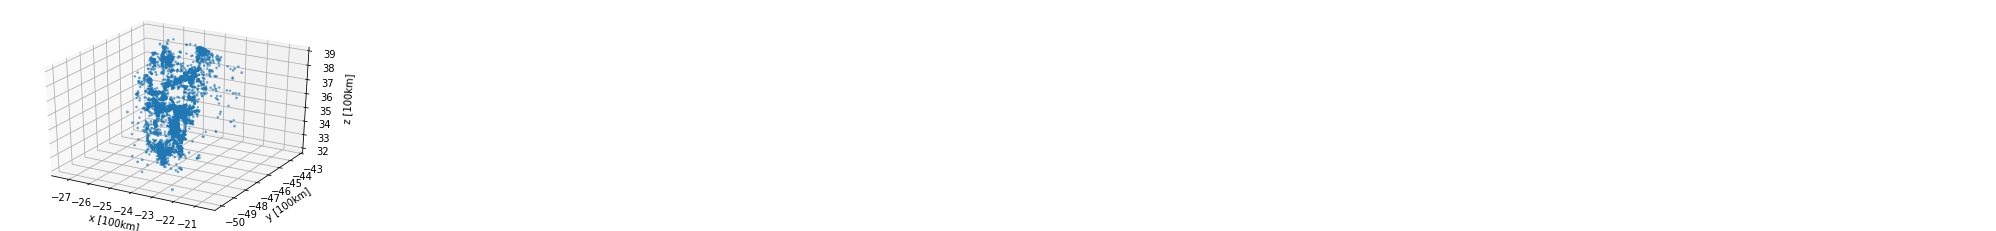

In [203]:
magnitude = df['magnitude']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coord[:10000]/1e05, y_coord[:10000]/1e05, z_coord[:10000]/1e05, s=magnitude[:10000], marker="o", alpha = 0.5)
ax.set_xlabel("x [100km]")
ax.set_ylabel("y [100km]")
ax.set_zlabel("z [100km]")
plt.show()

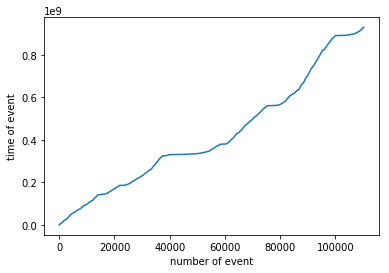

In [204]:
plt.plot(df['event'], df['time'])
plt.xlabel('number of event')
plt.ylabel('time of event')
plt.show()

In [205]:
plt.close()

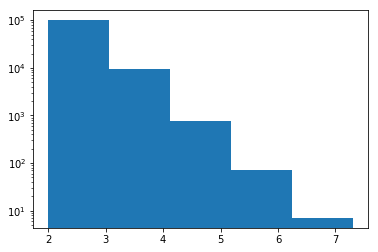

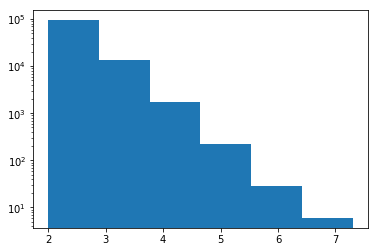

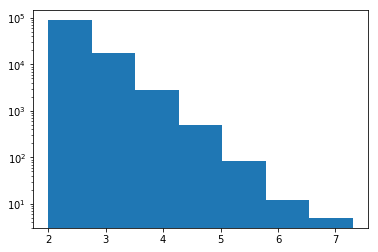

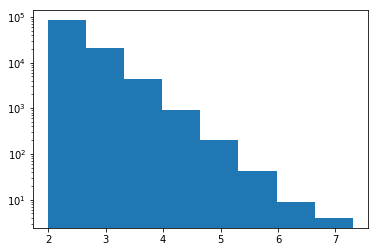

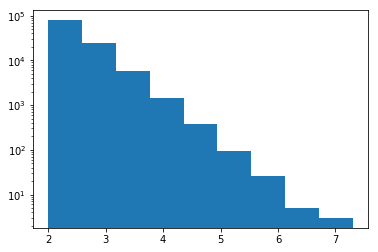

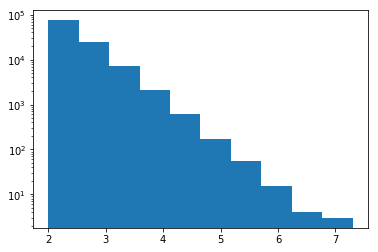

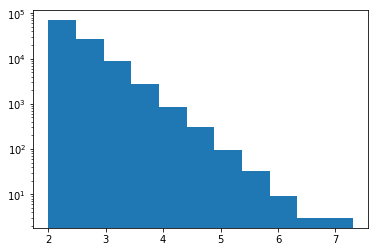

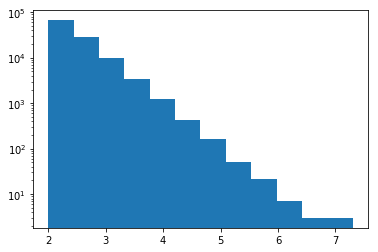

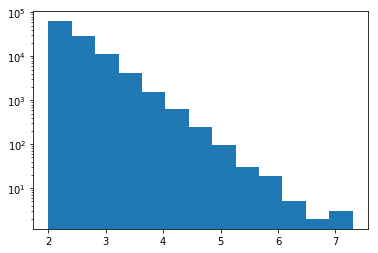

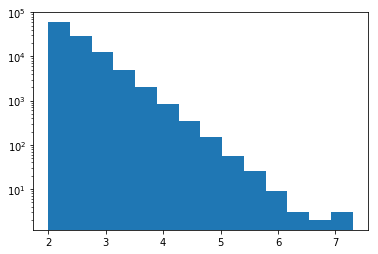

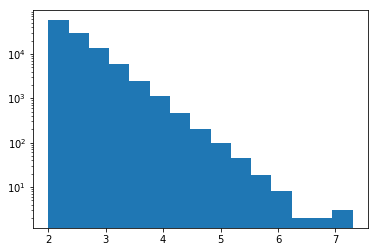

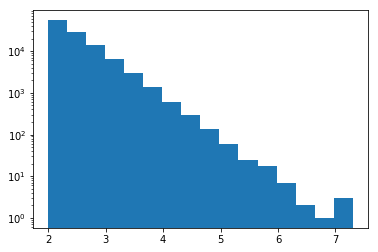

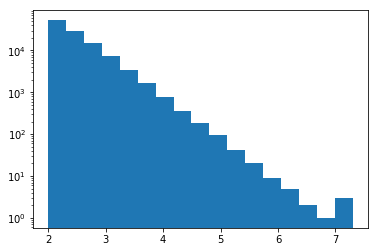

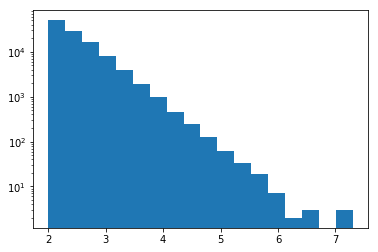

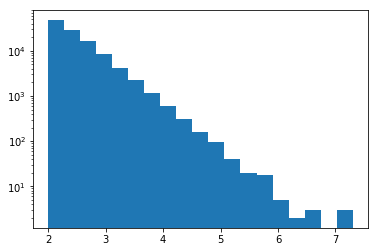

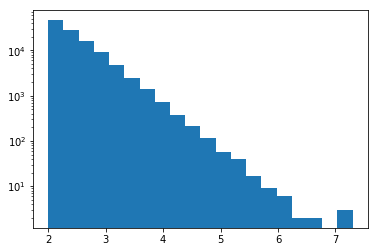

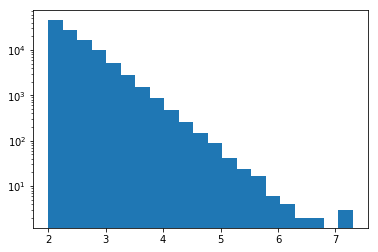

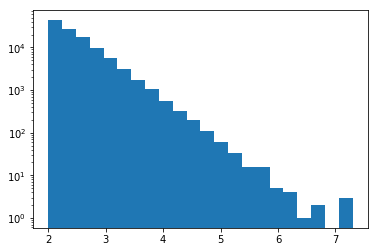

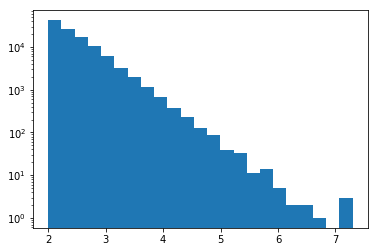

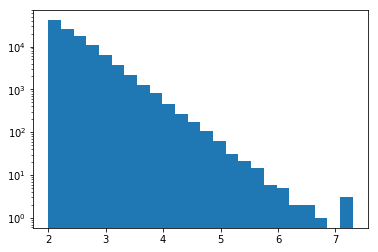

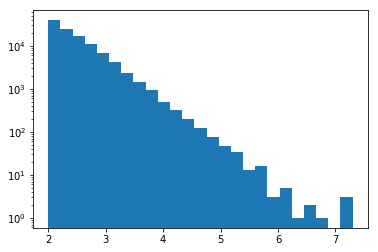

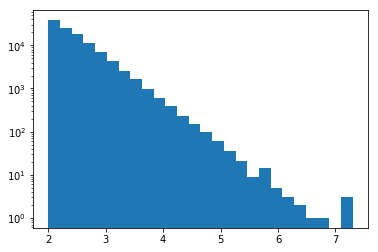

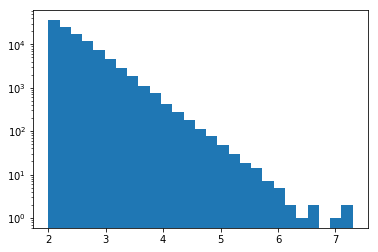

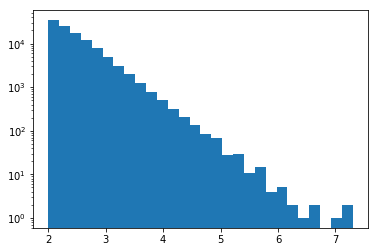

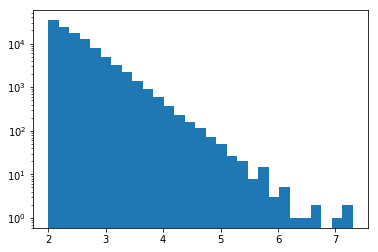

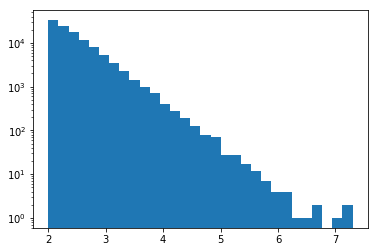

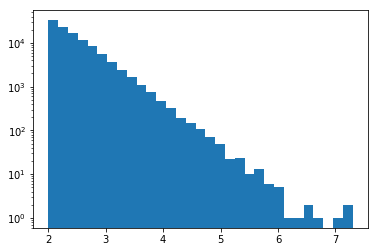

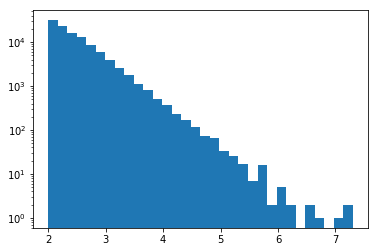

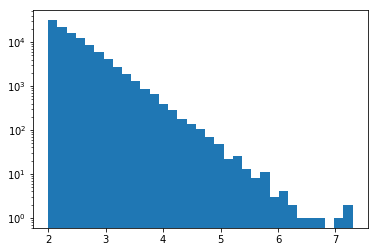

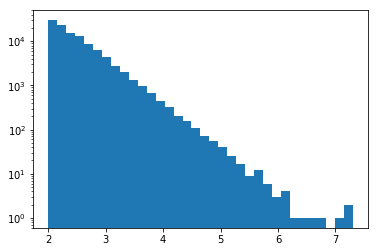

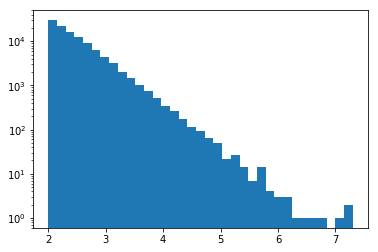

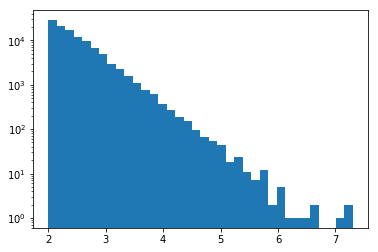

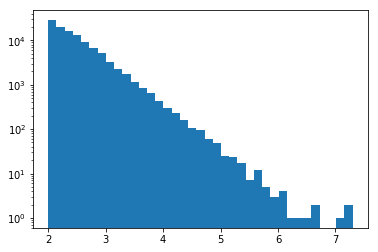

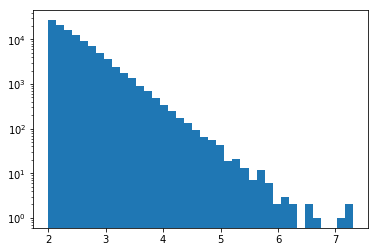

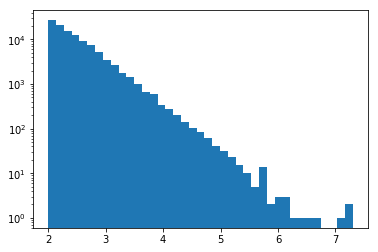

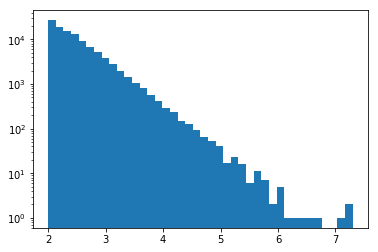

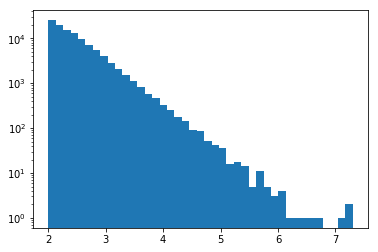

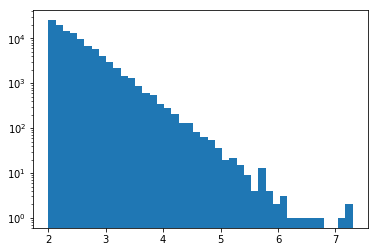

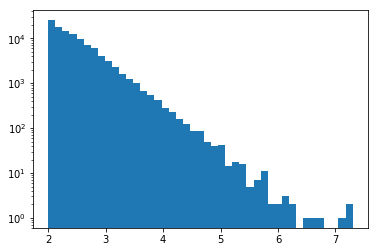

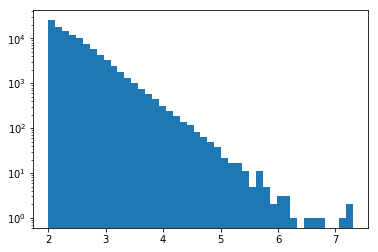

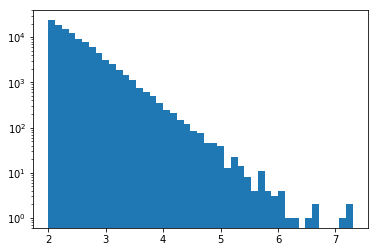

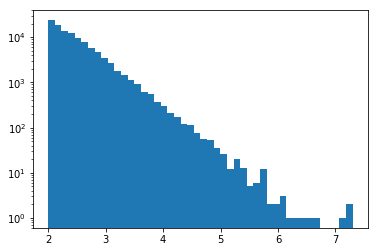

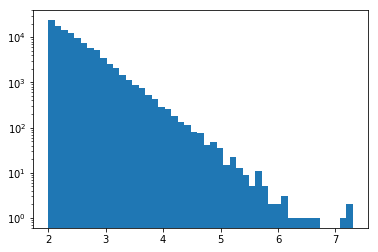

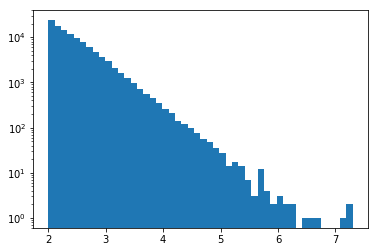

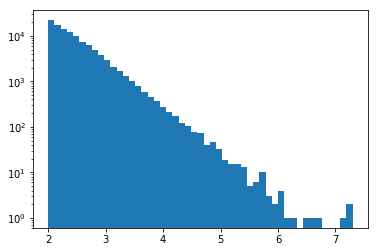

In [206]:
n_bins = np.arange(5,50)
for bins in n_bins:
    plt.hist(df['magnitude'], bins = bins, log = True)
    plt.show()
plt.close()

# PCA

In [207]:
X = df[['x','y','z']].values.T
X = X.astype("float64")
print(X[0,:100])
print(X.dtype)

[-2571956. -2363740. -2363746. -2475085. -2238642. -2545592. -2361034.
 -2484433. -2429713. -2526232. -2485135. -2599098. -2372004. -2383691.
 -2390195. -2383185. -2537196. -2568383. -2401535. -2387578. -2539134.
 -2413423. -2501434. -2501346. -2398783. -2335838. -2528993. -2530868.
 -2482740. -2488460. -2360332. -2529557. -2440825. -2485615. -2511113.
 -2321743. -2470322. -2433239. -2433149. -2420711. -2529682. -2391089.
 -2570653. -2398286. -2383274. -2585844. -2358789. -2207226. -2536576.
 -2455347. -2681989. -2383844. -2345179. -2383126. -2520135. -2666585.
 -2283393. -2544091. -2536404. -2419054. -2358531. -2339181. -2379390.
 -2487950. -2565838. -2563270. -2564573. -2345344. -2406051. -2390290.
 -2390918. -2362796. -2463586. -2377536. -2323920. -2323832. -2537393.
 -2373784. -2395448. -2329611. -2296960. -2385800. -2522206. -2652587.
 -2484292. -2336445. -2516152. -2570567. -2340682. -2516943. -2606807.
 -2370565. -2380205. -2344575. -2340586. -2331435. -2483499. -2394601.
 -2502

In [208]:
print(X.mean(axis = 1), '\n')
for i in range(3):
    X[i] = (X[i] - X[i].mean())/X[i].std()
    #X[i] = X[i] - X[i].mean()
    
print(X.mean(axis = 1), '\n')
print(X.std(axis = 1))
print(X.dtype)

[-2388225.0547288  -4691072.02910103  3562612.05938098] 

[ 1.49285434e-15 -1.19593304e-15 -1.20418085e-15] 

[1. 1. 1.]
float64


In [209]:
print(X[0,:100])

[-2.06951334  0.27579539  0.27572781 -0.97837528  1.68487745 -1.77255384
  0.3062753  -1.08366953 -0.46731298 -1.55448618 -1.09157673 -2.3752361
  0.18271113  0.0510708  -0.02218912  0.0567703  -1.67798276 -2.02926769
 -0.1499209   0.00728831 -1.69981205 -0.28382526 -1.27516583 -1.27417461
 -0.11892286  0.59007865 -1.5855856  -1.60670527 -1.06459987 -1.12902895
  0.31418251 -1.5919384  -0.59247661 -1.09698337 -1.38418839  0.74884228
 -0.92472568 -0.50702923 -0.50601549 -0.36591602 -1.59334637 -0.03225898
 -2.05483658 -0.11332473  0.05576782 -2.22594535  0.33156259  2.0387418
 -1.67099919 -0.75604989 -3.30890587  0.04934744  0.48486326  0.05743486
 -1.48581063 -3.1353979   1.18080999 -1.75564684 -1.66906181 -0.34725187
  0.33446866  0.55242368  0.09951652 -1.1232844  -2.00060126 -1.97167575
 -1.98635252  0.48300473 -0.20078834 -0.02325918 -0.03033287  0.28642844
 -0.84885255  0.12039965  0.72432093  0.72531214 -1.68020173  0.16266152
 -0.081358    0.6602185   1.02799367  0.02731539 -1.5

In [210]:
C = np.cov(X)
U, spectrum, Vt = la.svd(C)

In [211]:
print("shapes:", U.shape,  spectrum.shape, Vt.shape)
#n = 3
#l_svd =  spectrum**2/(n-1)
print (spectrum,'\n')
#print (l_svd,'\n')
print (U,'\n')
print (Vt,'\n')

# V = U.T for SVD applied to a squared matrix

shapes: (3, 3) (3,) (3, 3)
[2.40189791e+00 5.96194962e-01 1.93433620e-03] 

[[-0.50236446 -0.81259416 -0.29550073]
 [ 0.64203311 -0.12164878 -0.75696437]
 [ 0.57915752 -0.56999325  0.58282438]] 

[[-0.50236446  0.64203311  0.57915752]
 [-0.81259416 -0.12164878 -0.56999325]
 [-0.29550073 -0.75696437  0.58282438]] 



In [212]:
perc_expl2 = (spectrum[0] + spectrum[1]) / spectrum.sum()
print('Percent of the total variability explained considering the two main features: ', perc_expl2, '\n')

Percent of the total variability explained considering the two main features:  0.9993552271146228 



In [213]:
Xp = np.dot(Vt,X)
print(Xp.shape)

(3, 110271)


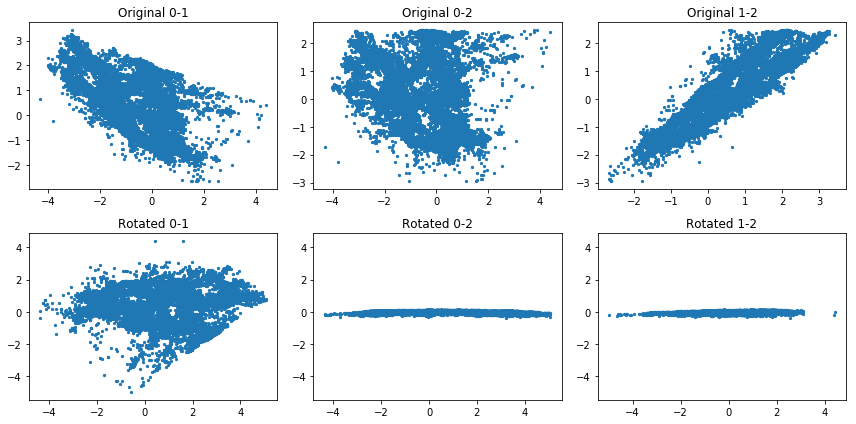

In [214]:
fig, axes = plt.subplots(nrows=2, ncols=3,
                               figsize=(12, 6))

#print(axes)
[[ax01, ax02, ax03],[ax11, ax12, ax13]] = axes

ax01.scatter(X[0], X[1], s= 5)
ax01.set_title('Original 0-1')
ax02.scatter(X[0], X[2], s= 5)
ax02.set_title('Original 0-2')
ax03.scatter(X[1], X[2], s= 5)
ax03.set_title('Original 1-2')

ax11.scatter(Xp[0], Xp[1], s= 5)
ax11.set_title('Rotated 0-1')
(y_bottom, y_top) = ax11.get_ylim()
ax12.scatter(Xp[0], Xp[2], s= 5)
ax12.set_ylim(y_bottom, y_top)
ax12.set_title('Rotated 0-2')
ax13.scatter(Xp[1], Xp[2], s= 5)
ax13.set_ylim(y_bottom, y_top)
ax13.set_title('Rotated 1-2')

plt.tight_layout()
plt.show()

In [215]:
#help(plt.Axes.get_ylim)

In [216]:
print(Vt)
print(U)

[[-0.50236446  0.64203311  0.57915752]
 [-0.81259416 -0.12164878 -0.56999325]
 [-0.29550073 -0.75696437  0.58282438]]
[[-0.50236446 -0.81259416 -0.29550073]
 [ 0.64203311 -0.12164878 -0.75696437]
 [ 0.57915752 -0.56999325  0.58282438]]


In [217]:
[v1, v2, v3] = Vt
print(v1)
normal = v3

[-0.50236446  0.64203311  0.57915752]


In [218]:
xx, yy = np.meshgrid(range(-4,5), range(-4,5))

In [219]:
# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy ) * 1. /normal[2]

In [220]:
%matplotlib nbagg
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0][:1000], X[1][:1000], X[2][:1000], c=magnitude[:1000]/magnitude[:1000].max(), 
           marker="o", alpha = 0.9, cmap = 'autumn')
ax.plot_surface(xx, yy, z, alpha=0.2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

In [221]:
plt.close()
%matplotlib inline

In [222]:
#import seaborn as sns
#sns.set()
#fig = plt.figure()
#ax = fig.add_subplot()
#ax = sns.kdeplot(Xp[0][:1000], Xp[1][:1000])

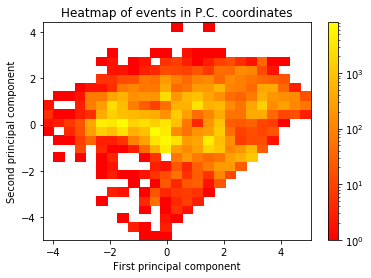

In [223]:
from matplotlib.colors import LogNorm
plt.figure(211)
plt.hist2d(Xp[0], Xp[1], bins = 25, norm = LogNorm(), cmap = "autumn")
plt.colorbar()
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Heatmap of events in P.C. coordinates')
plt.show()

In [224]:
plt.close()

# 2 - Distribution of waiting time 
Compute the distribution $P_m(t)$ of waiting times for events of magnitude m or above (i.e. do not consider events below $m$). In shaping the bin sizes, take into account that this distribution is expected to have a power-law decay with time (e.g $\sim 1/t$), and that a power-law is well visualized in log-log scale. Do this analysis for many values of $m$, say $m=2,3,4,5$.

In [225]:
from scipy import optimize
from scipy.stats import chisquare

In [226]:
def select_bin_number(x, min_nbin = 7, fraction = 0.001):
    n_min = fraction*len(x)
    
    n, bin_extremes, _ = plt.hist(x, bins = min_nbin )
    plt.close()
    last_n = n[-1]
    
    if last_n > n_min:
        return min_nbin, bin_extremes
    else:
        i = min_nbin 
        nbin = min_nbin
        while last_n < n_min and nbin < 100:
            nbin = nbin + 1
            #print('Attempt with nbin = {} \n'.format(nbin))
            n, _, _ = plt.hist(x, bins = nbin )
            plt.close()
            #print(n[i-1:])
            last_n = n[i-1:].sum()
            #print('Last n: ', last_n)
            #print('All n : ', n.sum())
            
        n, bin_extremes, _ = plt.hist(x, bins = nbin )
        plt.close()
        bins = np.concatenate((bin_extremes[:min_nbin],bin_extremes[-1:]))
        return nbin, bins

In [227]:
def logP(t, A, B):
    return A + B*t

In [228]:
from scipy.stats import norm
def hist_with_kde(axes, x_in, density = True, **kwargs):
    x = np.array(x_in)
    N = len(x)
    n, bins, _ = axes.hist(x, density = density, color = 'skyblue', **kwargs)
    num_bins = len(bins)
    sampling_number =  num_bins*10
    x_ax = np.linspace(x.min(), x.max(), num = sampling_number) 
    gauss = np.zeros((N, sampling_number))
    for i in range(N):
        gauss[i,:] = norm.pdf(x_ax, loc = x[i], scale = 1.06*x.std()*x.size**(-0.2))
    gauss_sum = np.sum(gauss, axis = 0)
    I = sp.integrate.trapz(gauss_sum, dx = (x.max()-x.min())/sampling_number)
    gauss_sum_norm = gauss_sum/I
    
    if 'orientation' in kwargs and kwargs['orientation'] == 'horizontal':
            # invert x and y
            axes.plot(gauss_sum_norm, x_ax, color = 'black', linewidth = '3', linestyle = 'solid')
    else:
        axes.plot(x_ax, gauss_sum_norm, color = 'black', linewidth = '3', linestyle = 'solid')

In [229]:
#help(optimize.curve_fit)

In [230]:
def plot_Pm_t(m, df, sigma_filter = 10):
    print('m = ', m, '\n')
    # waiting time for events of magnitude > m
    dfm = df[df['magnitude'] > m]
    timem = np.array(dfm['time'])
    timem.sort()
    time_d = timem[1:] - timem[:-1]
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
    ax1.plot(time_d)
    #ax1.axhline(time_d.mean()*2 + sigma_filter*time_d.std(), c = 'r')
    prova = time_d[time_d != time_d.max()]
    maximum = prova.max()
    if time_d.max()*3/4 > maximum:
        time_d = prova
    #time_d = time_d[mask]
    #print('Eliminated samples : ', len(timem) - len(time_d) -1, '\n')
    ax2.plot(time_d)
    
    plt.show()
    plt.close()
    # time differences rescaled to [0,1]
    time_diff = time_d/time_d.max()
    
    
    # computing suitable sizes of bins
    bin_number, bins = select_bin_number(time_diff)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
    
    n, bin_extremes, _  = ax1.hist(time_diff, bins = bins, histtype = 'step')
    
    bin_centers = (bin_extremes[:-1] + bin_extremes[1:])/2
    sigma_n = np.sqrt(n)
    ax1.errorbar(bin_centers, n, sigma_n, fmt = 'r.', label = 'entries with \npoisson error')
    ax1.legend(loc = 'upper right')
    ax1.set_yscale('log')
    
    print('Occurrencies for the first bin with {} original bins: '.format(bin_number), n[0], '\n')

    # rescaling the tail entries with the number of bins merged into the tail
    n = np.concatenate((n[:-1], n[-1:]/(bin_number+1-7)))
    # linear fit over the log of the entries
    params1, _ = optimize.curve_fit(logP, bin_centers, np.log(n), p0 = [np.log(n[0]),-1])
    [A,B] = params1
    print('A = {}\nB = {}'.format(round(A,2), round(B,2)))
    
    # chi squared and p-value tests
    chisq, p = chisquare(np.log(n), logP(bin_centers, *params1), ddof = 2 )
    
    ax2.plot(bin_centers, np.log(n), 'r.', label = 'entries')
    ax2.plot(bin_centers, logP(bin_centers, *params1), 
             label = 'A = {} \nB = {}\n$\chi^2$ = {} \np-value = {}'\
             .format(round(params1[0],1),round(params1[1],1),round(chisq,2),round(p,2)))
    ax2.legend()

    plt.show()
    plt.close()
    
    gridsize = (2, 3)
    fig = plt.figure(figsize=(10, 4))
    ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
    ax1.plot(time_diff)
    
    ax2 = plt.subplot2grid(gridsize, (0, 2), colspan = 1, rowspan = 2)
    n2, bins2, patches2 = ax2.hist(time_diff, bins = bins, orientation = 'horizontal', color = 'skyblue')
    #hist_with_kde(ax2, time_diff, bins = bins, histtype = 'step', orientation = 'horizontal')
    ax2.set_xscale('log')
    ax2.axis('off')
    plt.show()
    plt.close()
    
    # parameters of Pm from the one of logPm 
    a = np.exp(A)
    b = -B/time_d.max()
    return a, b, chisq, p

m =  2.0 



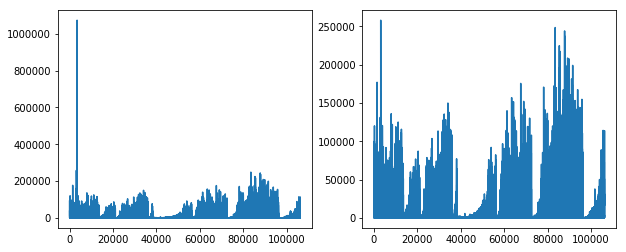

Occurrencies for the first bin with 12 original bins:  93444.0 

A = 10.63
B = -11.36


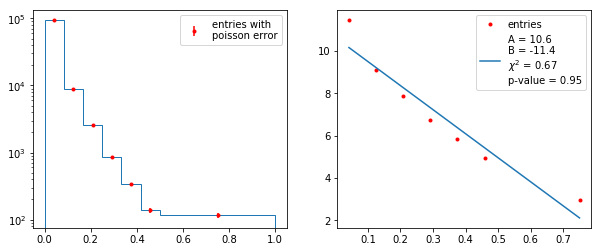

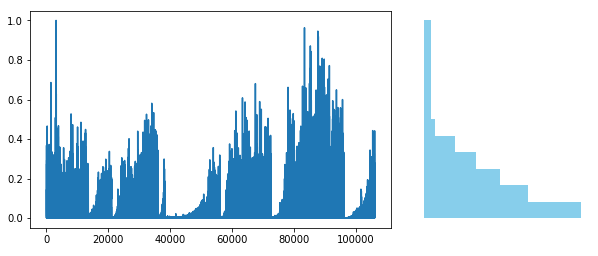

m =  2.5 



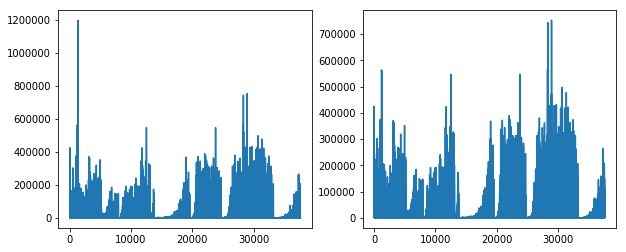

Occurrencies for the first bin with 13 original bins:  32640.0 

A = 9.52
B = -11.35


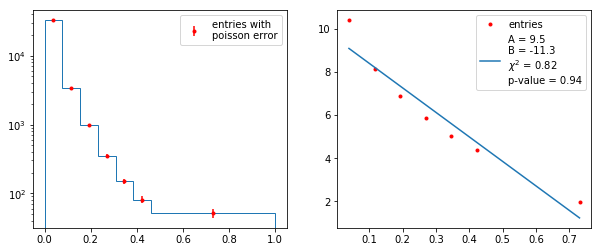

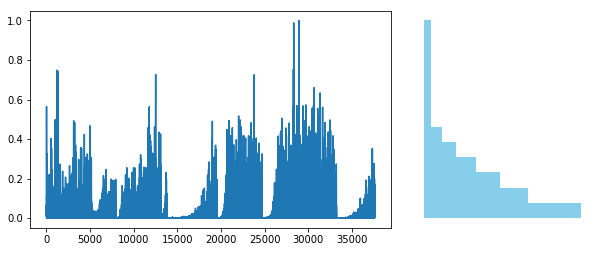

m =  3.0 



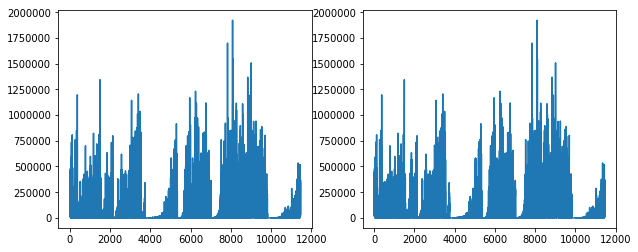

Occurrencies for the first bin with 10 original bins:  9908.0 

A = 8.76
B = -10.25


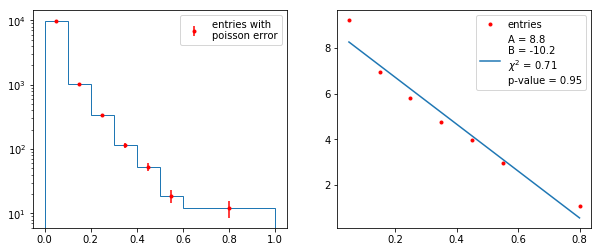

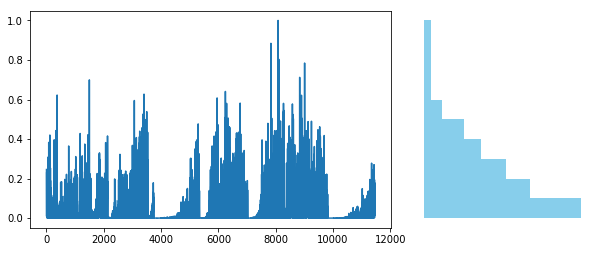

m =  3.5 



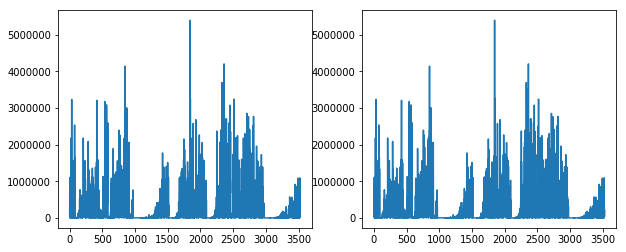

Occurrencies for the first bin with 9 original bins:  3029.0 

A = 7.67
B = -9.2


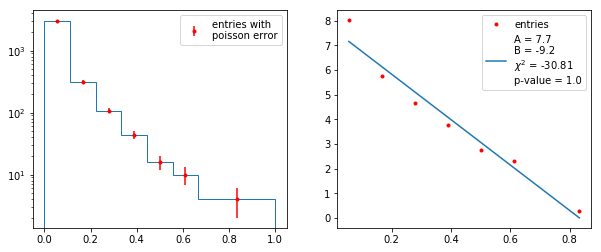

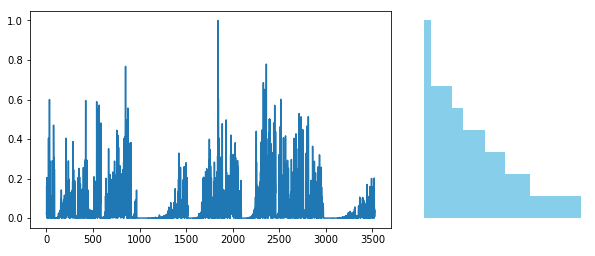

m =  4.0 



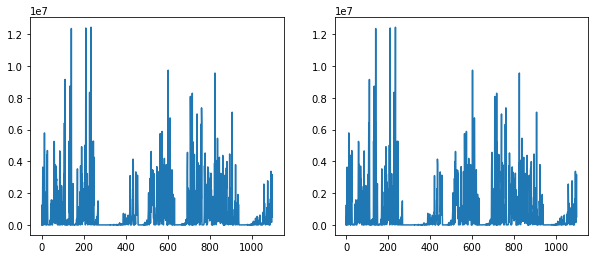

Occurrencies for the first bin with 7 original bins:  921.0 

A = 6.42
B = -6.64


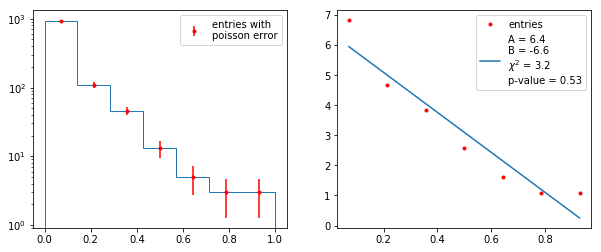

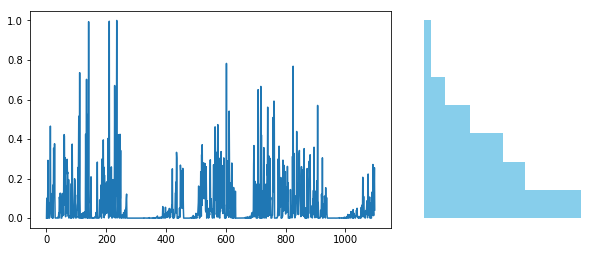

m =  4.5 



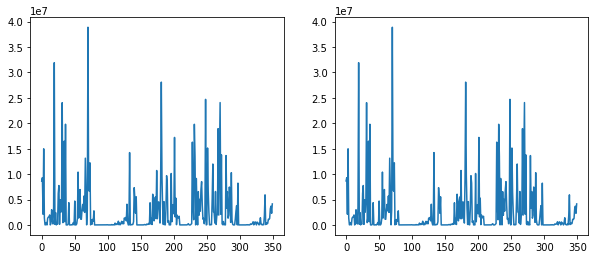

Occurrencies for the first bin with 7 original bins:  298.0 

A = 5.1
B = -5.97


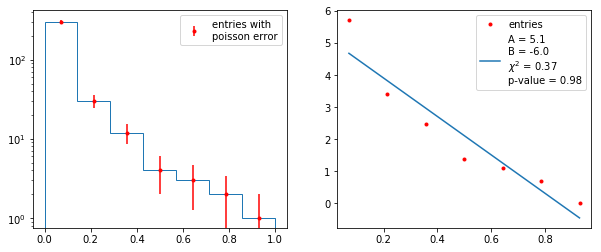

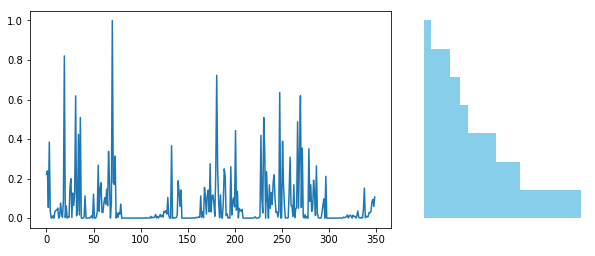

m =  5.0 



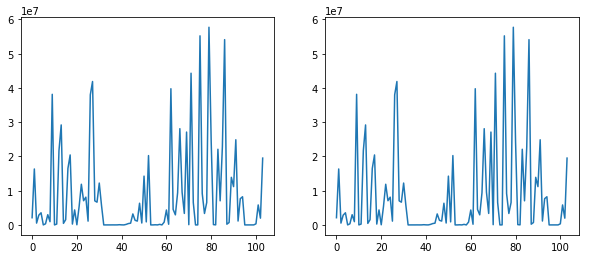

Occurrencies for the first bin with 7 original bins:  75.0 

A = 3.55
B = -3.43


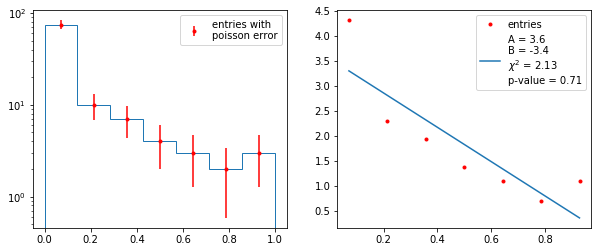

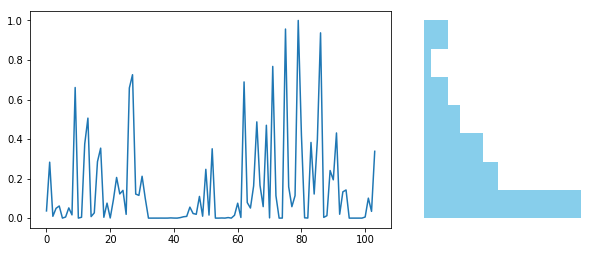

In [231]:
ms = np.linspace(2,5,7)

As = np.zeros(len(ms))
Bs = np.zeros(len(ms))
chis = np.zeros(len(ms))
ps = np.zeros(len(ms))

for i in range(len(ms)):
    m = ms[i]
    As[i], Bs[i], chis[i], ps[i] = plot_Pm_t(m, df)

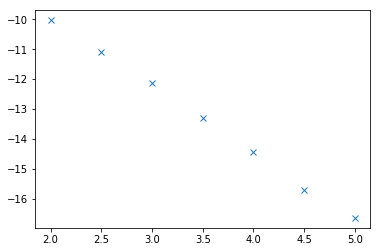

In [232]:
plt.plot(ms, np.log(Bs), 'x')
plt.show()

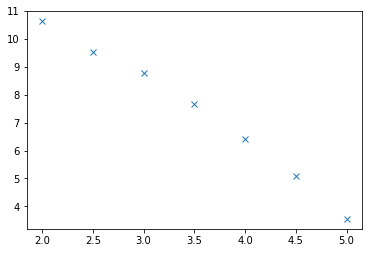

In [233]:
#questo lascia il tempo che trova
plt.plot(ms, np.log(As), 'x')
plt.show()

# 3 - Distribution of distance between events

Compute the distribution $P_m(r)$ of the distance between an event and the next one, considering earthquakes of magnitude m or above. Also here make a clever choice for the bin sizes and try several values of $m$.

In [234]:
m = 3
dfm = df[df['magnitude'] > m]
X = np.array(dfm[['x','y','z']])
r = np.linalg.norm(X[1:]-X[:-1], axis = 1)


In [235]:
def plot_Pm_r(m, df, sigma_filter = 10):
    print('m = ', m, '\n')
    # waiting time for events of magnitude > m
    dfm = df[df['magnitude'] > m]
    X = np.array(dfm[['x','y','z']])
    r = np.linalg.norm(X[1:]-X[:-1], axis = 1)
    r_norm = r/r.max()
    
    
    # computing suitable sizes of bins
    bin_number, bins = select_bin_number(r_norm)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
    
    n, bin_extremes, _  = ax1.hist(r_norm, bins = bins, histtype = 'step')
    
    bin_centers = (bin_extremes[:-1] + bin_extremes[1:])/2
    sigma_n = np.sqrt(n)
    ax1.errorbar(bin_centers, n, sigma_n, fmt = 'r.', label = 'entries with \npoisson error')
    ax1.legend(loc = 'upper right')
    ax1.set_yscale('log')
    
    print('Occurrencies for the first bin with {} original bins: '.format(bin_number), n[0], '\n')

    # rescaling the tail entries with the number of bins merged into the tail
    n = np.concatenate((n[:-1], n[-1:]/(bin_number+1-7)))
    # linear fit over the log of the entries
    params1, _ = optimize.curve_fit(logP, bin_centers, np.log(n), p0 = [np.log(n[0]),-1])
    [A,B] = params1
    print('A = {}\nB = {}'.format(round(A,2), round(B,2)))
    
    # chi squared and p-value tests
    chisq, p = chisquare(np.log(n), logP(bin_centers, *params1), ddof = 2 )
    
    ax2.plot(bin_centers, np.log(n), 'r.', label = 'entries')
    ax2.plot(bin_centers, logP(bin_centers, *params1), 
             label = 'A = {} \nB = {}\n$\chi^2$ = {} \np-value = {}'\
             .format(round(params1[0],1),round(params1[1],1),round(chisq,2),round(p,2)))
    ax2.legend()

    plt.show()
    plt.close()
    
    gridsize = (2, 3)
    fig = plt.figure(figsize=(10, 4))
    ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
    ax1.plot(r)
    
    ax2 = plt.subplot2grid(gridsize, (0, 2), colspan = 1, rowspan = 2)
    n2, bins2, patches2 = ax2.hist(r, bins = bins, orientation = 'horizontal', color = 'skyblue')
    #hist_with_kde(ax2, time_diff, bins = bins, histtype = 'step', orientation = 'horizontal')
    ax2.set_xscale('log')
    ax2.axis('off')
    plt.show()
    plt.close()
    
    # parameters of Pm from the one of logPm 
    a = np.exp(A)
    b = -B/r.max()
    return a, b, chisq, p, r.mean(), r.std()/len(r)

m =  2.0 

Occurrencies for the first bin with 8 original bins:  56422.0 

A = 11.4
B = -5.98


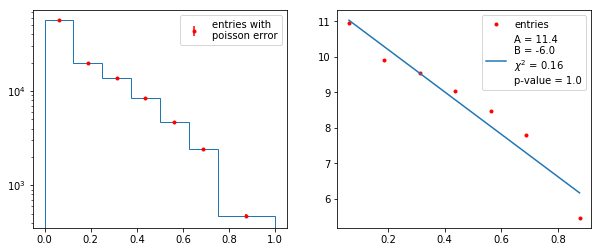

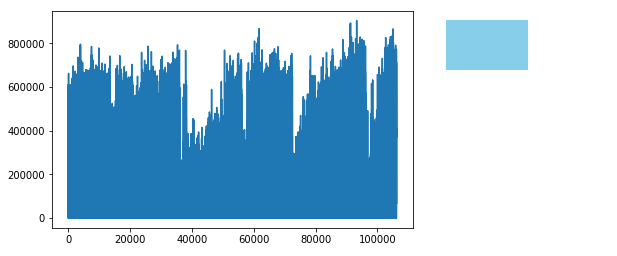

m =  2.230769230769231 

Occurrencies for the first bin with 7 original bins:  37992.0 

A = 11.19
B = -6.16


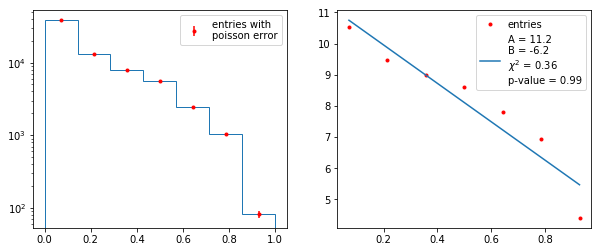

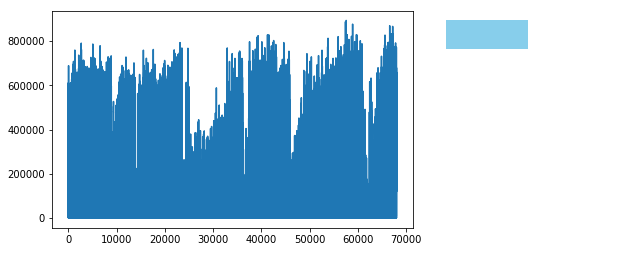

m =  2.4615384615384617 

Occurrencies for the first bin with 7 original bins:  23607.0 

A = 10.55
B = -5.68


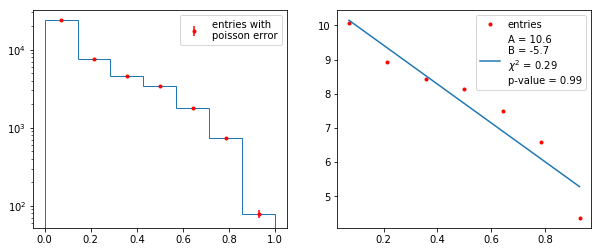

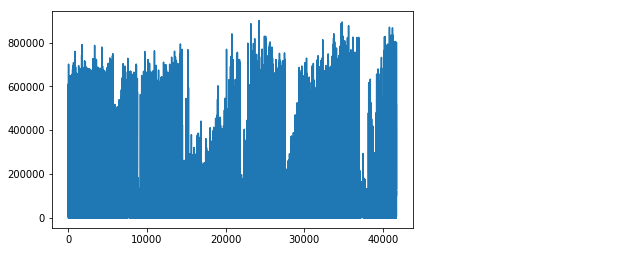

m =  2.6923076923076925 

Occurrencies for the first bin with 8 original bins:  13899.0 

A = 9.98
B = -6.24


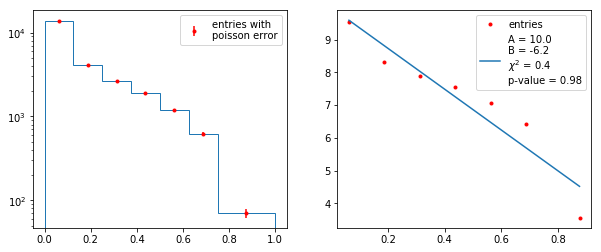

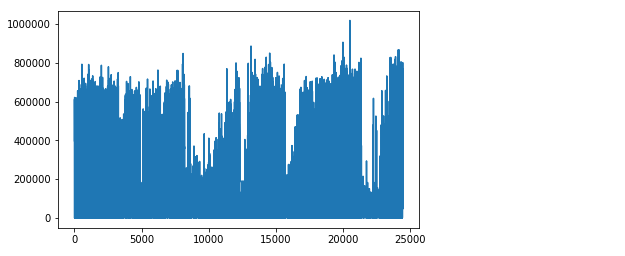

m =  2.9230769230769234 

Occurrencies for the first bin with 8 original bins:  8240.0 

A = 9.28
B = -5.77


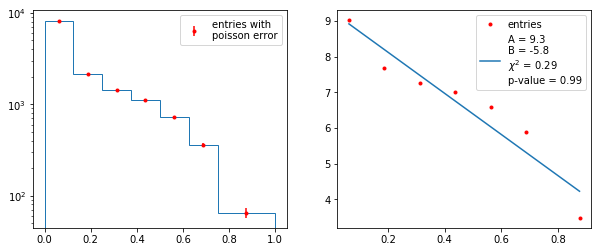

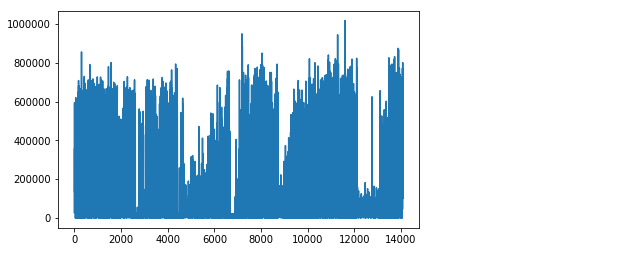

m =  3.153846153846154 

Occurrencies for the first bin with 8 original bins:  4764.0 

A = 8.67
B = -5.65


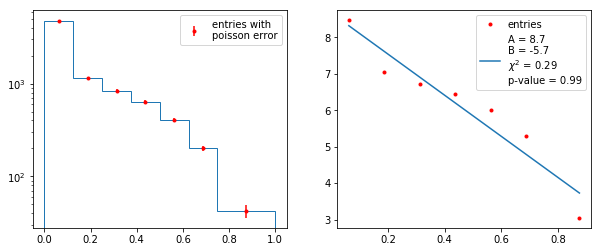

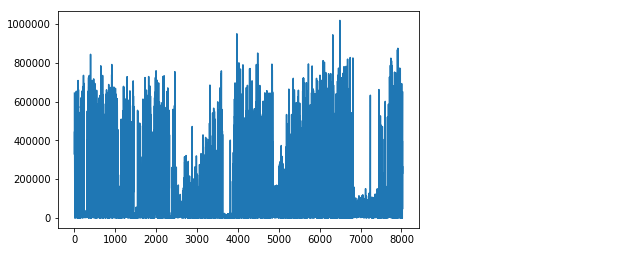

m =  3.3846153846153846 

Occurrencies for the first bin with 7 original bins:  2922.0 

A = 8.44
B = -6.09


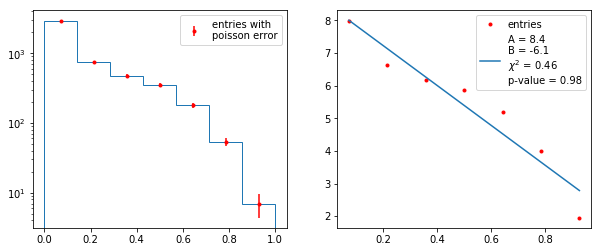

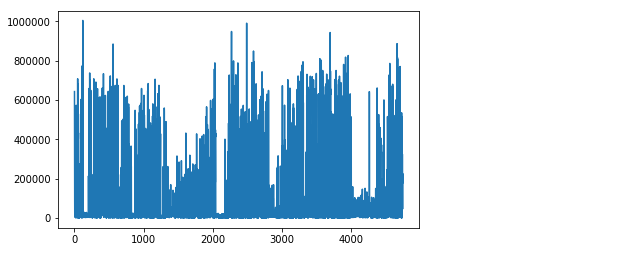

m =  3.6153846153846154 

Occurrencies for the first bin with 7 original bins:  1686.0 

A = 7.85
B = -6.0


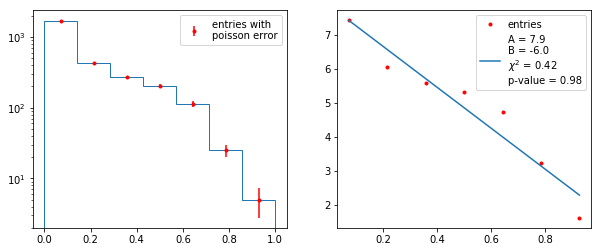

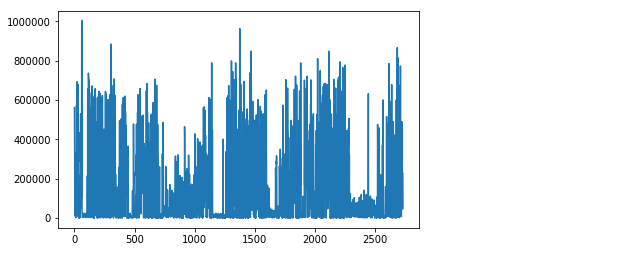

m =  3.8461538461538463 

Occurrencies for the first bin with 7 original bins:  973.0 

A = 7.28
B = -5.89


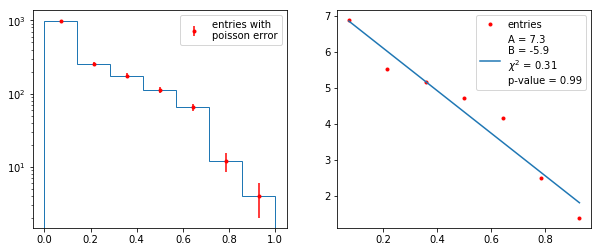

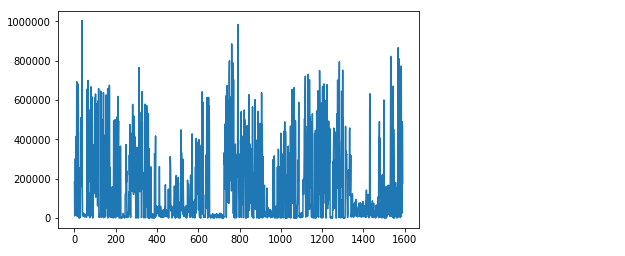

m =  4.076923076923077 

Occurrencies for the first bin with 7 original bins:  558.0 

A = 6.3
B = -4.32


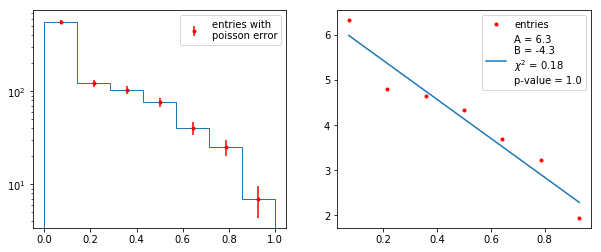

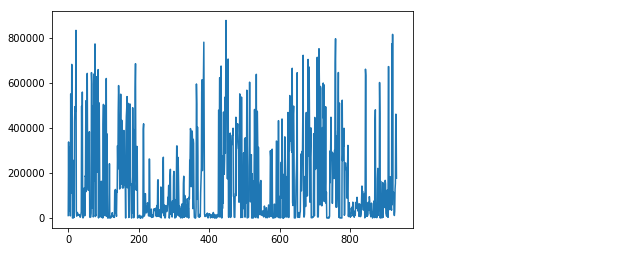

m =  4.307692307692308 

Occurrencies for the first bin with 7 original bins:  322.0 

A = 5.74
B = -4.14


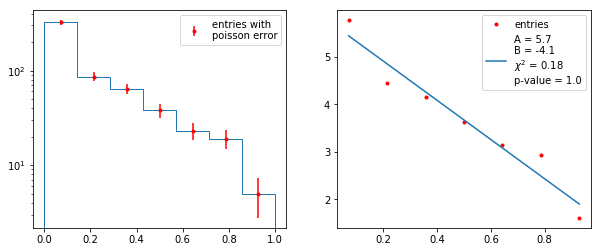

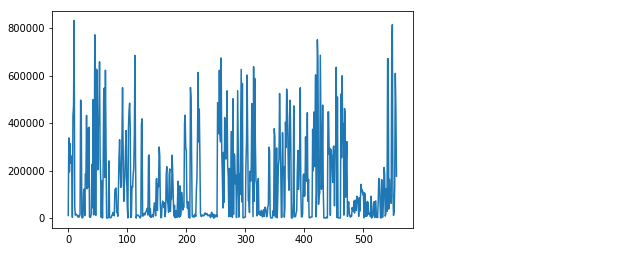

m =  4.538461538461538 

Occurrencies for the first bin with 7 original bins:  203.0 

A = 5.17
B = -4.34


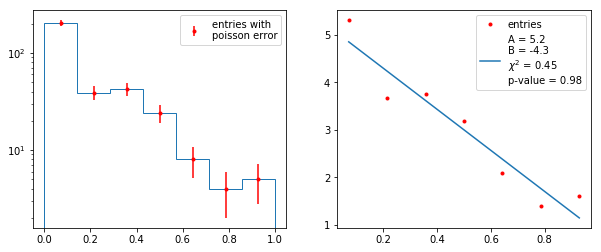

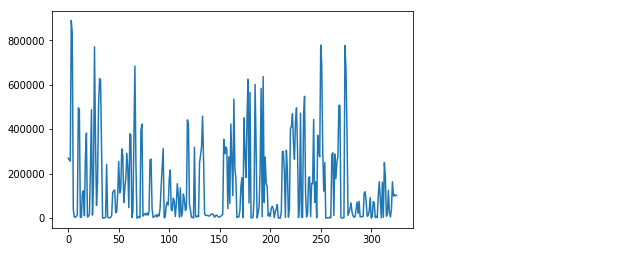

m =  4.769230769230769 

Occurrencies for the first bin with 7 original bins:  120.0 

A = 4.35
B = -3.38


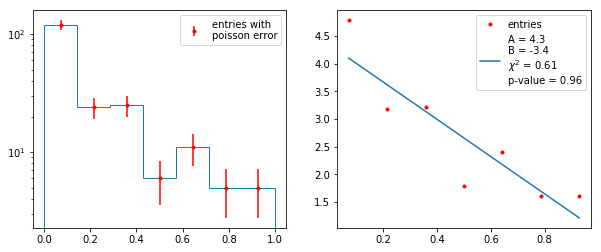

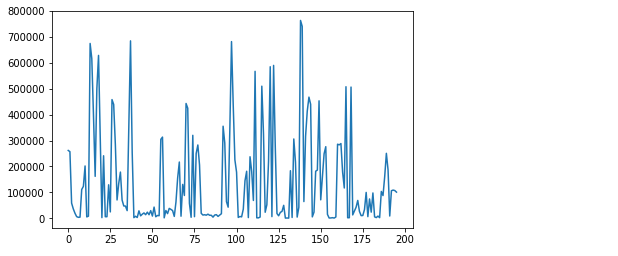

m =  5.0 

Occurrencies for the first bin with 7 original bins:  55.0 

A = 3.81
B = -3.22


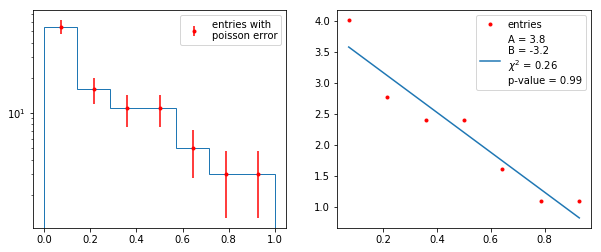

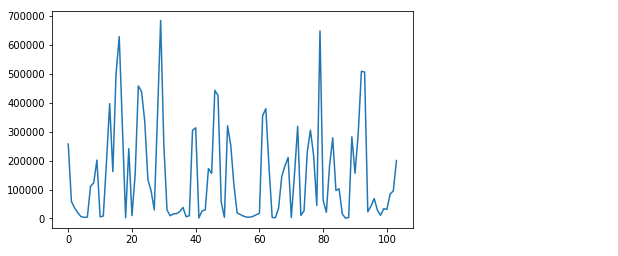

In [236]:
ms = np.linspace(2,5,14)

Ar = np.zeros(len(ms))
Br = np.zeros(len(ms))
chir = np.zeros(len(ms))
pr = np.zeros(len(ms))
r_mean = np.zeros(len(ms))
r_std = np.zeros(len(ms))
for i in range(len(ms)):
    m = ms[i]
    Ar[i], Br[i], chir[i], pr[i], r_mean[i], r_std[i] = plot_Pm_r(m, df)

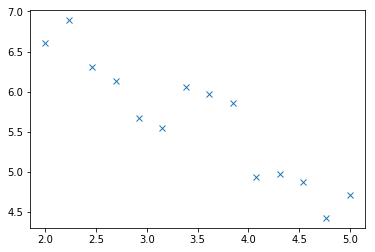

In [237]:
plt.plot(ms, Br*1e06, 'x')
plt.show()

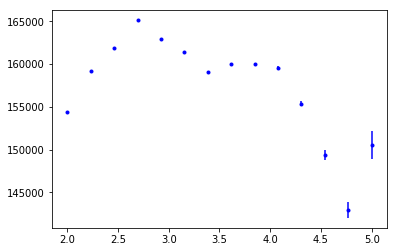

In [238]:
plt.errorbar(ms, r_mean, yerr = r_std, fmt = 'b.')
plt.show()

In [239]:
r_indep_events = []
for i in range(len(ms)):
    dfm = df[(df['magnitude'] > ms[i]) & (df['prev_event'] == -1)]
    X = np.array(dfm[['x','y','z']])
    r = np.linalg.norm(X[1:]-X[:-1], axis = 1)
    r_indep_events.append(r.mean())


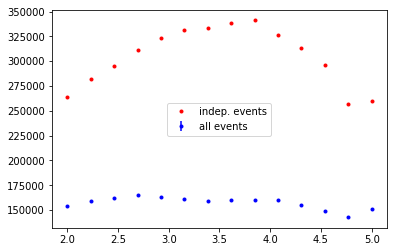

In [240]:
plt.errorbar(ms, r_mean, yerr = r_std, fmt = 'b.', label = 'all events')
plt.plot(ms, r_indep_events, 'r.', label = 'indep. events')
plt.legend(loc = 'center')
#plt.legend(loc = 10)
plt.show()

# Branches / families

In [241]:
def evees_light(df, index=-1, depth=0):
    dataset = {}
    df_filtered = df[df["prev_event"]==index]
    lenght =  df_filtered.shape[0]
    for i in range(lenght):
        event = df_filtered.iloc[i]
        #dataset[str(event["id"])] = {"event" : event}
        dataset[str(int(event["event"]))] = {"depth" : depth}
        dataset[str(int(event["event"]))]["children"] = evees_light(df, index=int(event["event"]), depth = depth + 1)
    return dataset

In [242]:
tree_dataset = evees_light(df)

In [243]:
from copy import deepcopy

In [244]:
new_df = deepcopy(df)
new_df['edges'] = 0
new_df['depth'] = 0

In [245]:
def write_dict_array(dataset, dict_array):
    for k in dataset.keys():
        depth = dataset[k]['depth']
        # k is the keyword, children_ids are the values
        if len(dict_array) < depth + 1 :
            while len(dict_array) < depth + 1:
                dict_array.append({})
        else:
            dict_array[depth][k] = list(dataset[k]['children'].keys())
        if len(list(dataset[k]['children'].keys())) != 0:
            write_dict_array(dataset[k]['children'], dict_array)

In [246]:
v_dict = [{}]

In [247]:
write_dict_array(tree_dataset, v_dict)

In [248]:
N = df.shape[0]
edges = np.zeros(N)
depths = np.zeros(N)

In [249]:
for d in range(len(v_dict)):
    for k in v_dict[d].keys():
        #print(k)
        edges[int(k)] = len(v_dict[d][k])
        depths[int(k)] = d

In [250]:
df['edges'] = edges
df['depth'] = depths

In [251]:
df[df['magnitude'] == 7.3]

,event,prev_event,time,magnitude,x,y,z,edges,depth
0,0,-1,0.000000e+00,2.71,-2571956,-4627162,3520602,752.0,0.0
1,1,0,3.650139e+04,2.12,-2363740,-4787011,3461373,0.0,0.0
2,2,0,3.748828e+04,2.33,-2363746,-4786942,3461232,0.0,1.0
3,3,0,4.798252e+04,2.57,-2475085,-4664024,3548479,0.0,1.0
4,4,0,6.026857e+04,2.98,-2238642,-4839098,3469546,0.0,1.0
5,5,0,1.006128e+05,2.04,-2545592,-4588519,3597315,0.0,1.0
6,6,0,1.063590e+05,2.27,-2361034,-4748837,3502194,0.0,1.0
7,7,0,1.275294e+05,2.64,-2484433,-4558759,3679010,0.0,1.0
8,8,0,1.303646e+05,2.62,-2429713,-4582352,3681247,0.0,1.0
9,9,0,1.341326e+05,2.48,-2526232,-4571575,3618942,0.0,1.0


In [252]:
mean_mag = df.groupby('depth')['magnitude'].mean()
print(len(mean_mag))

57


In [256]:
print(len(v_dict[0]['0']))

752


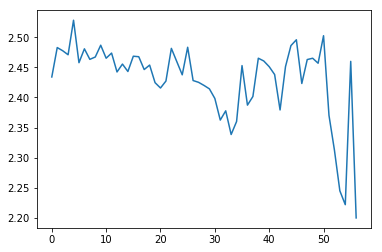

In [254]:
depth_axis = [i for i in range(len(mean_mag))]
plt.plot(depth_axis, mean_mag)
plt.show()

In [265]:
time_diff_tree = np.zeros(N)

for d in range(len(v_dict)):
    for k in v_dict[d].keys():
        # previous vertex has id = k, children vertexes have ids [ v_dict[d][k] ]
        for j in v_dict[d][k]:
            #print('Computing {}-> {} waiting time.'.format(k,j))
            time_diff_tree[int(j)] = df['time'].iloc[int(j)] - df['time'].iloc[int(k)]

In [266]:
time_diff_tree = time_diff_tree[time_diff_tree > 0]

In [291]:
def logPmod(t, A, B, C):
    return A + B/t**C

def logt(t, p, q, r):
    return p*np.log(t*r) + q

In [292]:
def plot_Pm_t_tree(time_d, sigma_filter = 10):

    # time differences rescaled to [0,1]
    time_diff = time_d/time_d.max()
    
    
    # computing suitable sizes of bins
    bin_number, bins = select_bin_number(time_diff)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
    
    n, bin_extremes, _  = ax1.hist(time_diff, bins = bins, histtype = 'step')
    
    bin_centers = (bin_extremes[:-1] + bin_extremes[1:])/2
    sigma_n = np.sqrt(n)
    ax1.errorbar(bin_centers, n, sigma_n, fmt = 'r.', label = 'entries with \npoisson error')
    ax1.legend(loc = 'upper right')
    ax1.set_yscale('log')
    
    print('Occurrencies for the first bin with {} original bins: '.format(bin_number), n[0], '\n')

    # rescaling the tail entries with the number of bins merged into the tail
    n = np.concatenate((n[:-1], n[-1:]/(bin_number+1-7)))
    # linear fit over the log of the entries
    #params1, _ = optimize.curve_fit(logPmod, bin_centers, np.log(n), p0 = [np.log(n[0]),-1,1])
    params1, _ = optimize.curve_fit(logt, bin_centers, np.log(n), p0 = [-1,5,1])
    [A,B,C] = params1
    print('A = {}\nB = {}\nC = {}'.format(round(A,2), round(B,2), round(C,2)))
    
    # chi squared and p-value tests
    chisq, p = chisquare(np.log(n), logt(bin_centers, *params1), ddof = 2 )
    
    ax2.plot(bin_centers, np.log(n), 'r.', label = 'entries')
    ax2.plot(bin_centers, logt(bin_centers, *params1), 
             label = 'A = {} \nB = {}\nC = {}\n$\chi^2$ = {} \np-value = {}'\
             .format(round(params1[0],1),round(params1[1],1),round(params1[2],1),round(chisq,2),round(p,2)))
    ax2.legend()

    plt.show()
    plt.close()
    
    gridsize = (2, 3)
    fig = plt.figure(figsize=(10, 4))
    ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
    ax1.plot(time_diff)
    
    ax2 = plt.subplot2grid(gridsize, (0, 2), colspan = 1, rowspan = 2)
    n2, bins2, patches2 = ax2.hist(time_diff, bins = bins, orientation = 'horizontal', color = 'skyblue')
    #hist_with_kde(ax2, time_diff, bins = bins, histtype = 'step', orientation = 'horizontal')
    ax2.set_xscale('log')
    ax2.axis('off')
    plt.show()
    plt.close()
    
    # parameters of Pm from the one of logPm 
    a = np.exp(A)
    b = -B/time_d.max()**C
    return a, b, C, chisq, p

Occurrencies for the first bin with 13 original bins:  70193.0 

A = 8.66
B = -10.26


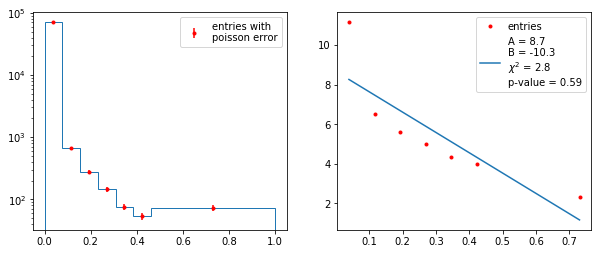

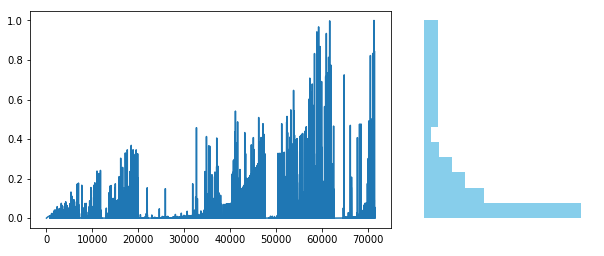

(5771.500663338263,
 1.4525980392391618e-08,
 2.801306905140317,
 0.5916071393382935)

In [268]:
a, b, C, chisq, p = plot_Pm_t_tree(time_diff_tree )

Occurrencies for the first bin with 13 original bins:  70193.0 

A = -2.71
B = 4.9
C = 0.32


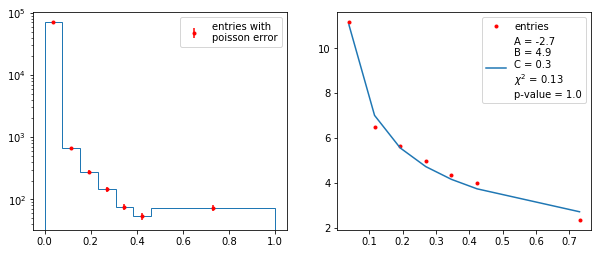

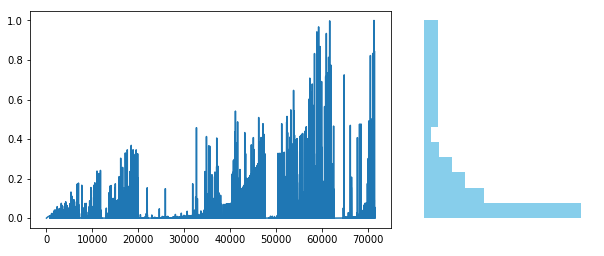

In [287]:
a, b, C, chisq, p = plot_Pm_t_tree(time_diff_tree )

Occurrencies for the first bin with 13 original bins:  70193.0 

A = -2.85
B = 5.6
C = 4.63


/home/nicola/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


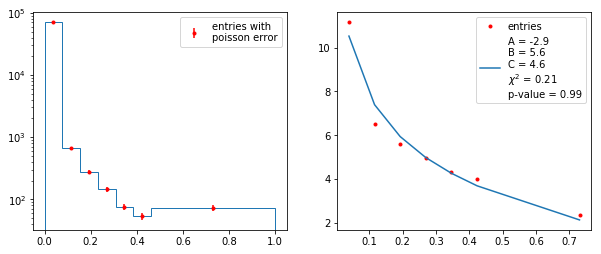

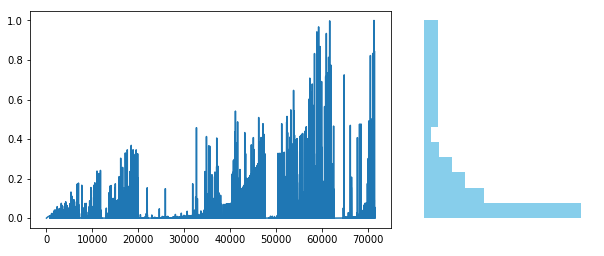

In [293]:
a, b, C, chisq, p = plot_Pm_t_tree(time_diff_tree )

In [296]:
def plot_Pm_t1(m, df, sigma_filter = 10):
    print('m = ', m, '\n')
    # waiting time for events of magnitude > m
    dfm = df[df['magnitude'] > m]
    timem = np.array(dfm['time'])
    timem.sort()
    time_d = timem[1:] - timem[:-1]
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
    ax1.plot(time_d)
    #ax1.axhline(time_d.mean()*2 + sigma_filter*time_d.std(), c = 'r')
    prova = time_d[time_d != time_d.max()]
    maximum = prova.max()
    if time_d.max()*3/4 > maximum:
        time_d = prova
    #time_d = time_d[mask]
    #print('Eliminated samples : ', len(timem) - len(time_d) -1, '\n')
    ax2.plot(time_d)
    
    plt.show()
    plt.close()
    # time differences rescaled to [0,1]
    time_diff = time_d/time_d.max()
    
    
    # computing suitable sizes of bins
    bin_number, bins = select_bin_number(time_diff)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
    
    n, bin_extremes, _  = ax1.hist(time_diff, bins = bins, histtype = 'step')
    
    bin_centers = (bin_extremes[:-1] + bin_extremes[1:])/2
    sigma_n = np.sqrt(n)
    ax1.errorbar(bin_centers, n, sigma_n, fmt = 'r.', label = 'entries with \npoisson error')
    ax1.legend(loc = 'upper right')
    ax1.set_yscale('log')
    
    print('Occurrencies for the first bin with {} original bins: '.format(bin_number), n[0], '\n')

    # rescaling the tail entries with the number of bins merged into the tail
    n = np.concatenate((n[:-1], n[-1:]/(bin_number+1-7)))
    # linear fit over the log of the entries
    params1, _ = optimize.curve_fit(logt, bin_centers, np.log(n), p0 = [-1,5,1])
    [p,q,r] = params1
    print('p = {}\nq = {}\nr = {}'.format(round(p,2), round(q,2), round(r,2)))
    
    # chi squared and p-value tests
    chisq, pv = chisquare(np.log(n), logt(bin_centers, *params1), ddof = 2 )
    
    ax2.plot(bin_centers, np.log(n), 'r.', label = 'entries')
    ax2.plot(bin_centers, logt(bin_centers, *params1), 
             label = 'p = {} \nq = {}\nr = {}\n$\chi^2$ = {} \np-value = {}'\
             .format(round(params1[0],1),round(params1[1],1),round(params1[2],1),round(chisq,2),round(pv,2)))
    ax2.legend()

    plt.show()
    plt.close()
    
    gridsize = (2, 3)
    fig = plt.figure(figsize=(10, 4))
    ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
    ax1.plot(time_diff)
    
    ax2 = plt.subplot2grid(gridsize, (0, 2), colspan = 1, rowspan = 2)
    n2, bins2, patches2 = ax2.hist(time_diff, bins = bins, orientation = 'horizontal', color = 'skyblue')
    #hist_with_kde(ax2, time_diff, bins = bins, histtype = 'step', orientation = 'horizontal')
    ax2.set_xscale('log')
    ax2.axis('off')
    plt.show()
    plt.close()
    
    # parameters of Pm from the one of logPm 
    #a = np.exp(A)
    #b = -B/time_d.max()
    return p, q, r, chisq, pv

m =  2.0 



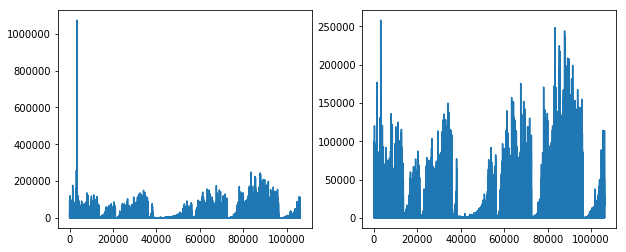

Occurrencies for the first bin with 12 original bins:  93444.0 

p = -2.89
q = 4.08
r = 1.55


/home/nicola/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


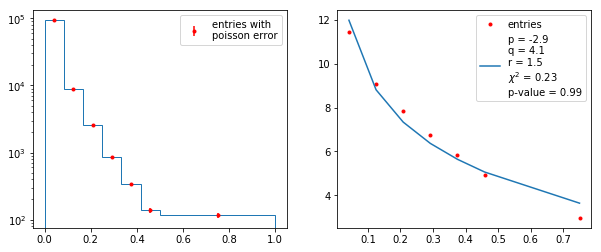

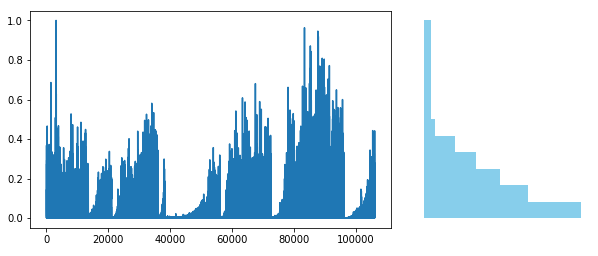

m =  2.5 



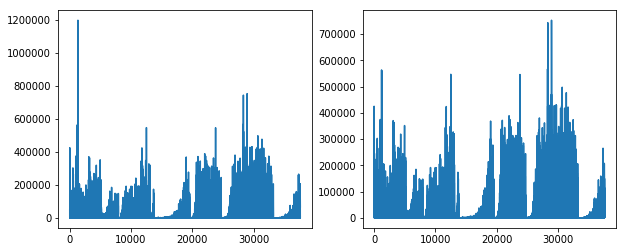

Occurrencies for the first bin with 13 original bins:  32640.0 

p = -2.77
q = 6.92
r = 6.14


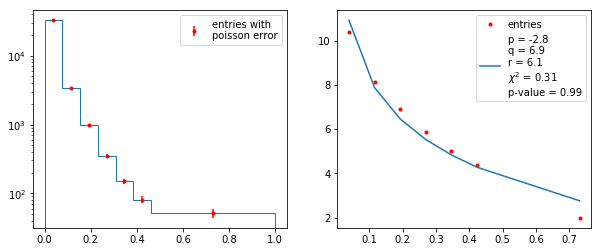

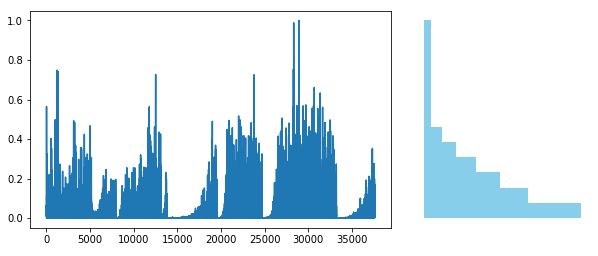

m =  3.0 



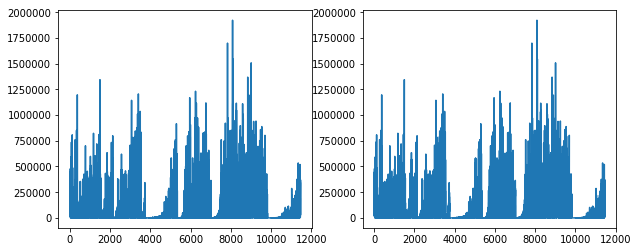

Occurrencies for the first bin with 10 original bins:  9908.0 

p = -2.8
q = 5.65
r = 4.6


/home/nicola/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


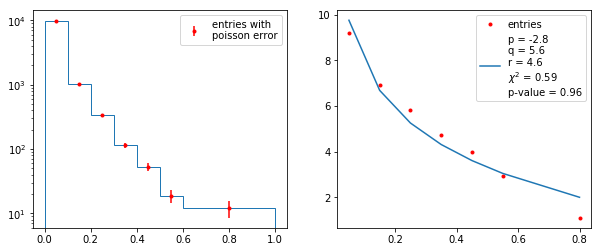

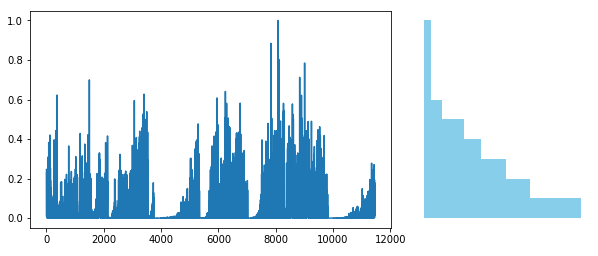

m =  3.5 



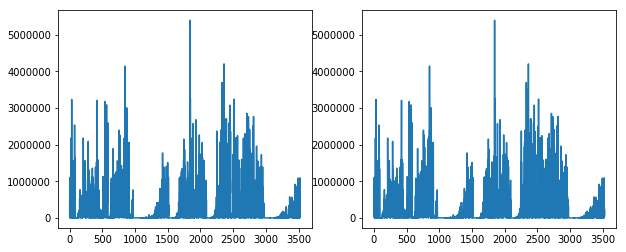

Occurrencies for the first bin with 9 original bins:  3029.0 

p = -2.67
q = 0.79
r = 1.0


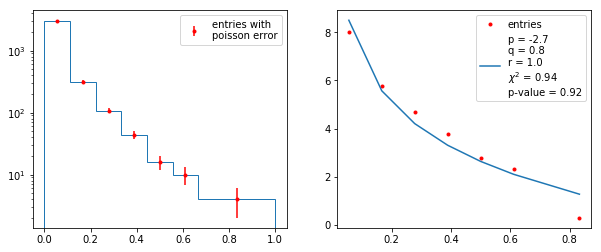

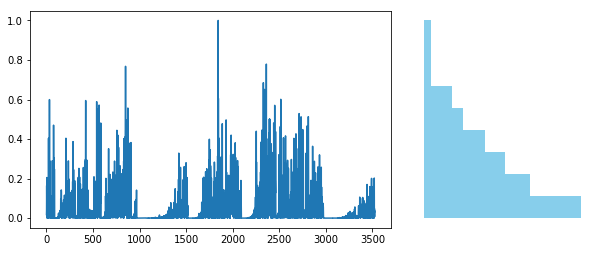

m =  4.0 



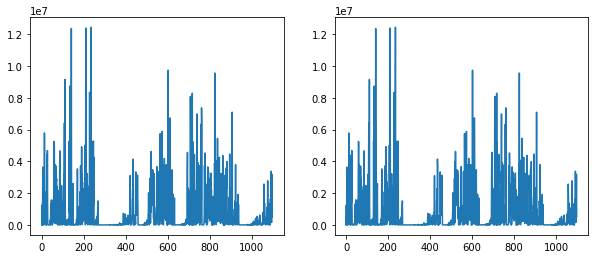

Occurrencies for the first bin with 7 original bins:  921.0 

p = -2.36
q = 4.49
r = 4.65


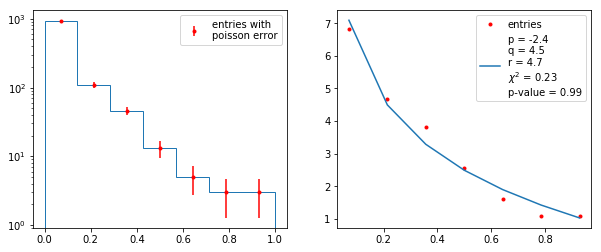

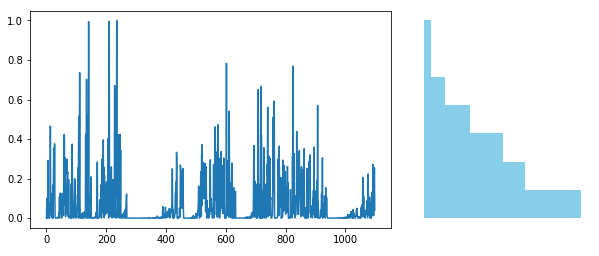

m =  4.5 



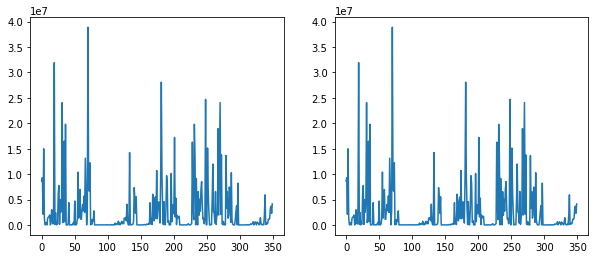

Occurrencies for the first bin with 7 original bins:  298.0 

p = -2.17
q = 4.18
r = 6.72


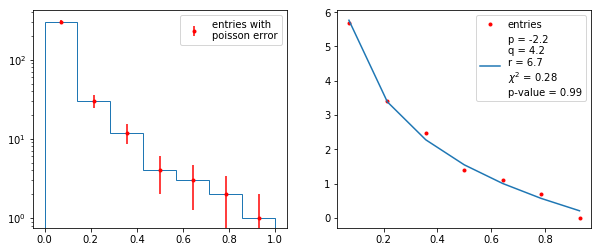

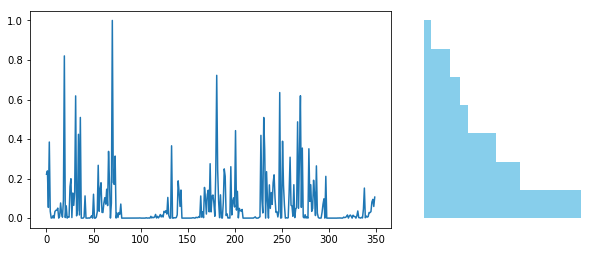

m =  5.0 



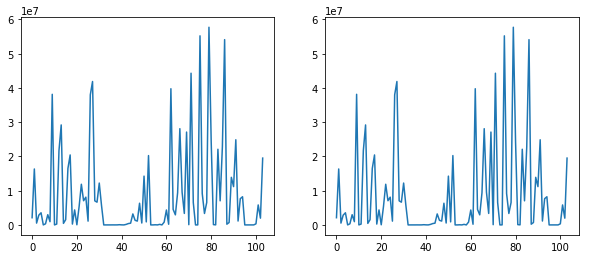

Occurrencies for the first bin with 7 original bins:  75.0 

p = -1.34
q = 1.6
r = 2.18


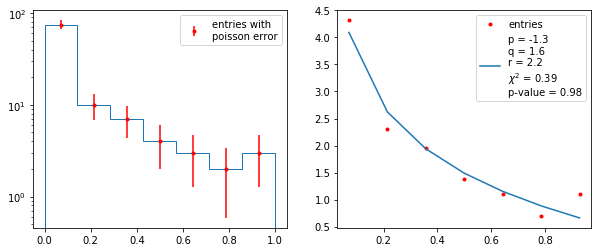

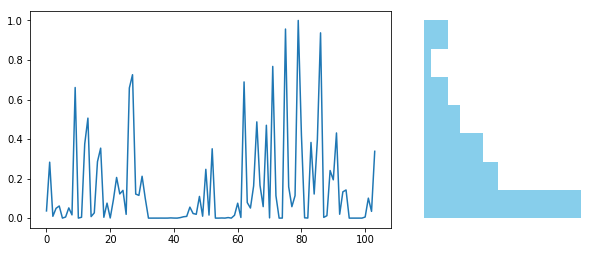

In [297]:
ms = np.linspace(2,5,7)

ps = np.zeros(len(ms))
qs = np.zeros(len(ms))
rs = np.zeros(len(ms))
chis = np.zeros(len(ms))
pvs = np.zeros(len(ms))

for i in range(len(ms)):
    m = ms[i]
    ps[i], qs[i], rs[i], chis[i], pvs[i] = plot_Pm_t1(m, df)

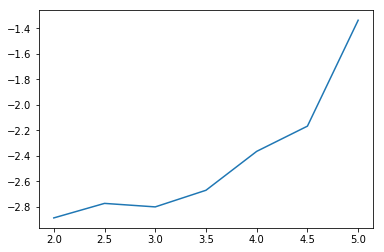

In [299]:
plt.plot(ms, ps )
plt.show()

In [300]:
def loglogt(t, p, q):
    return p*t + q

In [307]:
def plot_Pm_t2(m, df, sigma_filter = 10):
    print('m = ', m, '\n')
    # waiting time for events of magnitude > m
    dfm = df[df['magnitude'] > m]
    timem = np.array(dfm['time'])
    timem.sort()
    time_d = timem[1:] - timem[:-1]
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
    ax1.plot(time_d)
    #ax1.axhline(time_d.mean()*2 + sigma_filter*time_d.std(), c = 'r')
    prova = time_d[time_d != time_d.max()]
    maximum = prova.max()
    if time_d.max()*3/4 > maximum:
        time_d = prova
    #time_d = time_d[mask]
    #print('Eliminated samples : ', len(timem) - len(time_d) -1, '\n')
    ax2.plot(time_d)
    
    plt.show()
    plt.close()
    # time differences rescaled to [0,1]
    time_diff = time_d/time_d.max()
    
    
    # computing suitable sizes of bins
    bin_number, bins = select_bin_number(time_diff)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
    
    n, bin_extremes, _  = ax1.hist(time_diff, bins = bins, histtype = 'step')
    
    bin_centers = (bin_extremes[:-1] + bin_extremes[1:])/2
    sigma_n = np.sqrt(n)
    ax1.errorbar(bin_centers, n, sigma_n, fmt = 'r.', label = 'entries with \npoisson error')
    ax1.legend(loc = 'upper right')
    ax1.set_yscale('log')
    
    print('Occurrencies for the first bin with {} original bins: '.format(bin_number), n[0], '\n')

    # rescaling the tail entries with the number of bins merged into the tail
    n = np.concatenate((n[:-1], n[-1:]/(bin_number+1-7)))
    # linear fit over the log of the entries
    params1, _ = optimize.curve_fit(loglogt, np.log(bin_centers), np.log(n), p0 = [-1,5])
    [p,q] = params1
    print('p = {}\nq = {}'.format(round(p,2), round(q,2)))
    
    # chi squared and p-value tests
    chisq, pv = chisquare(np.log(n), loglogt(np.log(bin_centers), *params1), ddof = 2 )
    
    ax2.plot(np.log(bin_centers), np.log(n), 'r.', label = 'entries')
    ax2.plot(np.log(bin_centers), loglogt(np.log(bin_centers), *params1), 
             label = 'p = {} \nq = {}\n$\chi^2$ = {} \np-value = {}'\
             .format(round(params1[0],1),round(params1[1],1),round(chisq,2),round(pv,2)))
    ax2.legend()

    plt.show()
    plt.close()
    
    gridsize = (2, 3)
    fig = plt.figure(figsize=(10, 4))
    ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
    ax1.plot(time_diff)
    
    ax2 = plt.subplot2grid(gridsize, (0, 2), colspan = 1, rowspan = 2)
    n2, bins2, patches2 = ax2.hist(time_diff, bins = bins, orientation = 'horizontal', color = 'skyblue')
    #hist_with_kde(ax2, time_diff, bins = bins, histtype = 'step', orientation = 'horizontal')
    ax2.set_xscale('log')
    ax2.axis('off')
    plt.show()
    plt.close()
    
    # parameters of Pm from the one of logPm 
    #a = np.exp(A)
    #b = -B/time_d.max()
    return p, q, chisq, pv

m =  2.0 



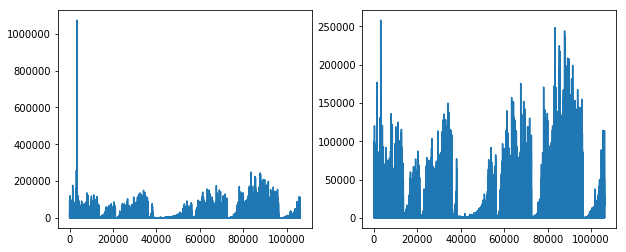

Occurrencies for the first bin with 12 original bins:  93444.0 

p = -2.89
q = 2.81


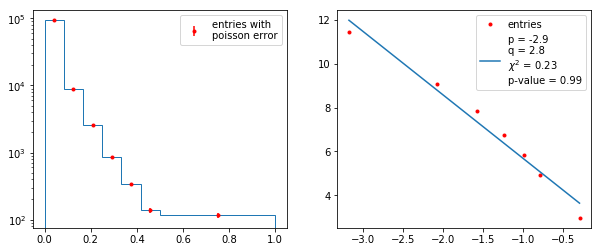

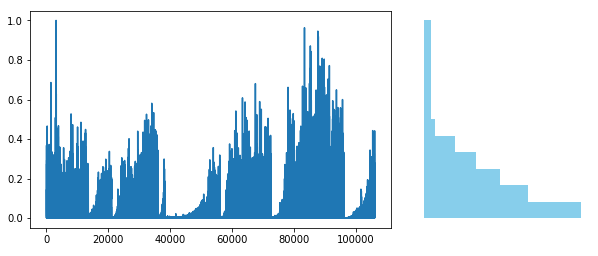

m =  2.5 



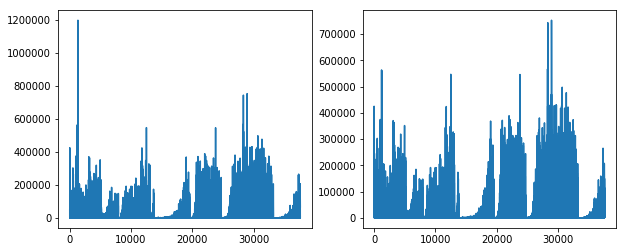

Occurrencies for the first bin with 13 original bins:  32640.0 

p = -2.77
q = 1.89


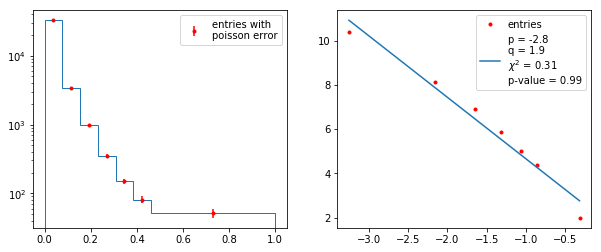

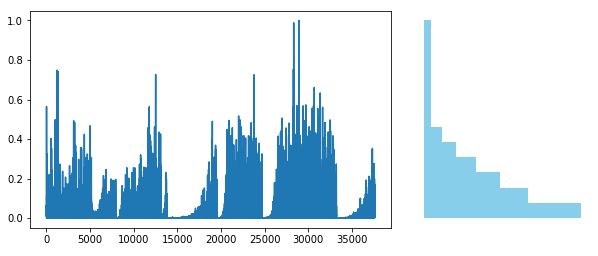

m =  3.0 



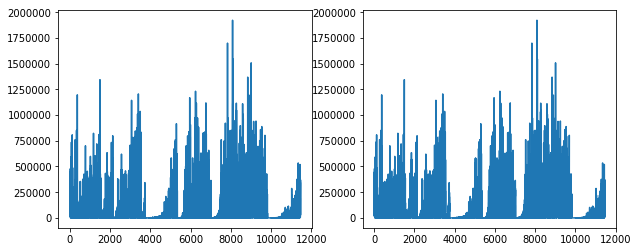

Occurrencies for the first bin with 10 original bins:  9908.0 

p = -2.8
q = 1.38


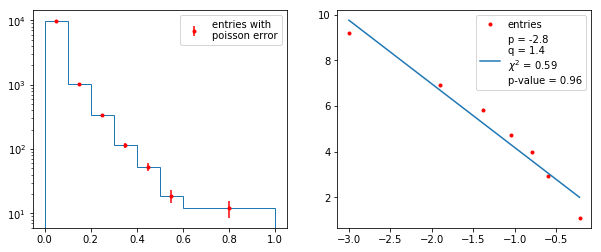

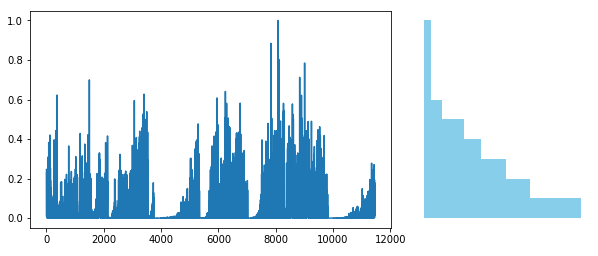

m =  3.5 



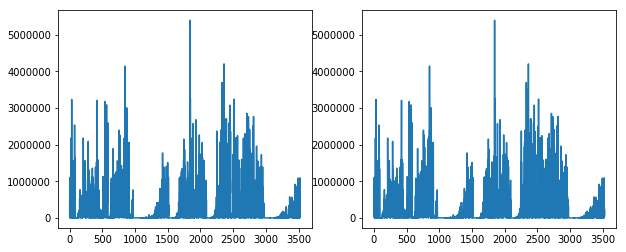

Occurrencies for the first bin with 9 original bins:  3029.0 

p = -2.67
q = 0.79


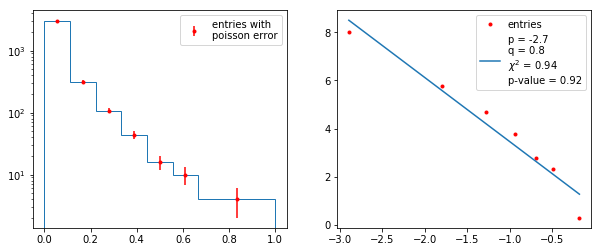

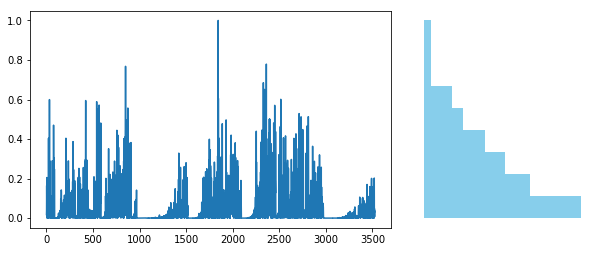

m =  4.0 



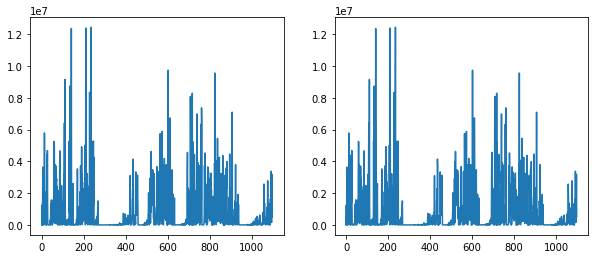

Occurrencies for the first bin with 7 original bins:  921.0 

p = -2.36
q = 0.85


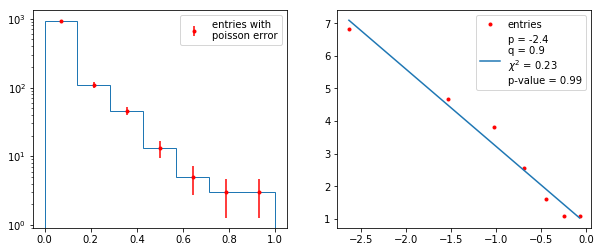

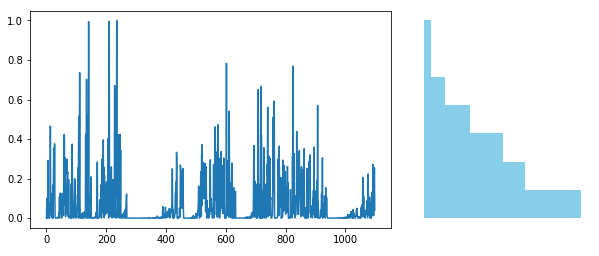

m =  4.5 



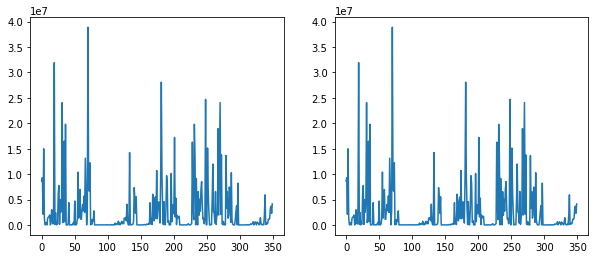

Occurrencies for the first bin with 7 original bins:  298.0 

p = -2.17
q = 0.05


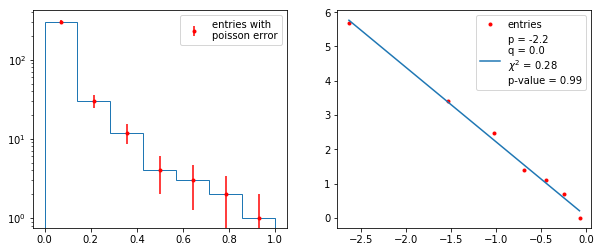

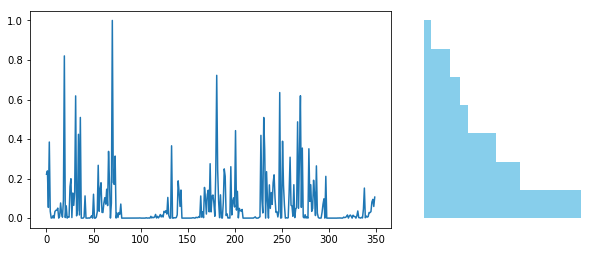

m =  5.0 



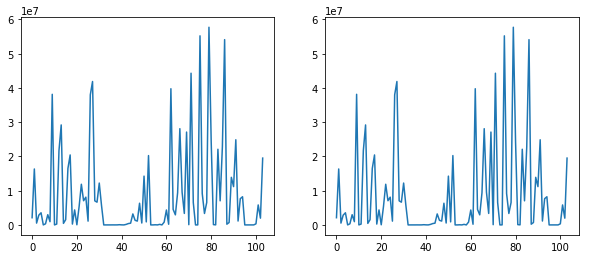

Occurrencies for the first bin with 7 original bins:  75.0 

p = -1.34
q = 0.56


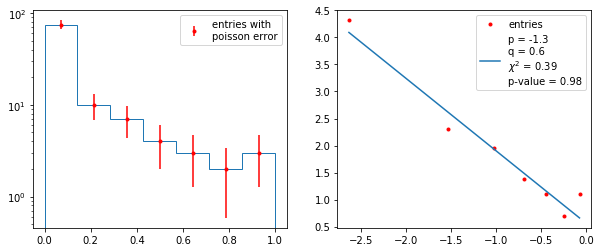

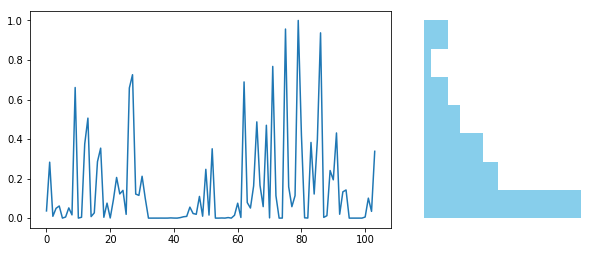

In [309]:
ps1 = np.zeros(len(ms))
qs1 = np.zeros(len(ms))
chis1 = np.zeros(len(ms))
pvs1 = np.zeros(len(ms))

for i in range(len(ms)):
    m = ms[i]
    ps1[i], qs1[i], chis1[i], pvs1[i] = plot_Pm_t2(m, df)

In [360]:
def exponent(m, a):
    return 1 + ( a - 1)*np.exp(-2+m)

def parabolic(x,a,b,c):
    return a*x**2 + b*x + c

In [357]:
param_a, _ = optimize.curve_fit(exponent, ms, ps, p0 = [3])
a = param_a[0]
print('a = {}'.format(round(a,2)))

a = 0.77


In [363]:
parab_p, _ = optimize.curve_fit(parabolic, ms, ps)
[a,b,c] = parab_p
a = round(a,2)
b = round(b,2)
c = round(c,2)

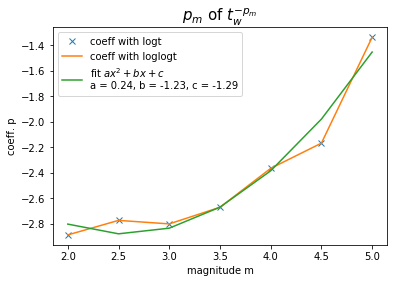

In [364]:
plt.plot(ms, ps, 'x', label = 'coeff with logt' )
plt.plot(ms, ps1, label = 'coeff with loglogt' )
#plt.plot(ms, exponent(ms, *param_a), label = 'fit')
plt.plot(ms, parabolic(ms, *parab_p), 
         label = 'fit $ax^2+bx+c$ \na = {}, b = {}, c = {}'.format(a,b,c))
plt.title('$p_m$ of $t_{w}^{-p_m}$', fontsize = 15 )
plt.xlabel('magnitude m')
plt.ylabel('coeff. p')
plt.legend()
plt.show()